In [11]:
#Import all libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import sklearn.utils.validation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from explainerdashboard import ExplainerDashboard
from sklearn.datasets import make_regression
from yellowbrick.regressor import ResidualsPlot, PredictionError


In [12]:
 
Bike_Sharing_hour= pd.read_csv('/Users/nataliemac/Desktop/VCS/Python/05_Capital_Bike_Share/Bike-Sharing-Dataset/hour.csv')

Bike_Sharing_hour

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1               0           1  0.22  0.2727  0.80     0.0000       8   
2               0           1  0.22  0.2727  0.80     0.0000       5   
3               0           1  0.24  0.2879  0.75     0.0000       3   
4               0           1  0.24  0.2879  0.75     0.0000       0   
...           ...         ...   ...     ...   ...        ...     ...   
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
0              13   16  
1              32   40  
2              27   32  
3              10   13  
4               1    1  
...           ...  ...  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49  

[17379 rows x 17 columns]

In [13]:

#Change column names:
Bike_Sharing_hour = Bike_Sharing_hour.rename(columns={'dteday': 'date'})
Bike_Sharing_hour = Bike_Sharing_hour.rename(columns={'hr': 'hour'})
Bike_Sharing_hour = Bike_Sharing_hour.rename(columns={'mnth': 'month'})
Bike_Sharing_hour = Bike_Sharing_hour.rename(columns={'yr': 'year'})
Bike_Sharing_hour = Bike_Sharing_hour.rename(columns={'cnt': 'total'})
Bike_Sharing_hour = Bike_Sharing_hour.rename(columns={'weathersit': 'weather'})
Bike_Sharing_hour = Bike_Sharing_hour.rename(columns={'hum': 'humidity'})
Bike_Sharing_hour = Bike_Sharing_hour.rename(columns={'casual': 'non_member'})
Bike_Sharing_hour = Bike_Sharing_hour.rename(columns={'registered': 'member'})


In [14]:

#Define the numeric columns for outlier detection
numeric_columns = ['season', 'workingday', 'temp', 'hour', 'humidity', 'total', 'member', 'non_member']

#Calculate the IQR for each numeric column
Q1 = Bike_Sharing_hour[numeric_columns].quantile(0.25)
Q3 = Bike_Sharing_hour[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

#Define the threshold for outlier detection
threshold = 1.5

#Create a boolean mask for outliers
outliers_mask = ((Bike_Sharing_hour[numeric_columns] < (Q1 - threshold * IQR)) |
                 (Bike_Sharing_hour[numeric_columns] > (Q3 + threshold * IQR))).any(axis=1)

#Remove rows with outliers
Bike_Sharing_hour_no_outliers = Bike_Sharing_hour[~outliers_mask]

#Print the shape of the dataset before and after removing outliers
print("Shape before removing outliers:", Bike_Sharing_hour.shape)
print("Shape after removing outliers:", Bike_Sharing_hour_no_outliers.shape)
Bike_Sharing_hour_no_outliers

Shape before removing outliers: (17379, 17)
Shape after removing outliers: (15536, 17)


instant        date  season  year  month  hour  holiday  weekday  \
0            1  2011-01-01       1     0      1     0        0        6   
1            2  2011-01-01       1     0      1     1        0        6   
2            3  2011-01-01       1     0      1     2        0        6   
3            4  2011-01-01       1     0      1     3        0        6   
4            5  2011-01-01       1     0      1     4        0        6   
...        ...         ...     ...   ...    ...   ...      ...      ...   
17374    17375  2012-12-31       1     1     12    19        0        1   
17375    17376  2012-12-31       1     1     12    20        0        1   
17376    17377  2012-12-31       1     1     12    21        0        1   
17377    17378  2012-12-31       1     1     12    22        0        1   
17378    17379  2012-12-31       1     1     12    23        0        1   

       workingday  weather  temp   atemp  humidity  windspeed  non_member  \
0               0        1  0.24  0.2879      0.81     0.0000           3   
1               0        1  0.22  0.2727      0.80     0.0000           8   
2               0        1  0.22  0.2727      0.80     0.0000           5   
3               0        1  0.24  0.2879      0.75     0.0000           3   
4               0        1  0.24  0.2879      0.75     0.0000           0   
...           ...      ...   ...     ...       ...        ...         ...   
17374           1        2  0.26  0.2576      0.60     0.1642          11   
17375           1        2  0.26  0.2576      0.60     0.1642           8   
17376           1        1  0.26  0.2576      0.60     0.1642           7   
17377           1        1  0.26  0.2727      0.56     0.1343          13   
17378           1        1  0.26  0.2727      0.65     0.1343          12   

       member  total  
0          13     16  
1          32     40  
2          27     32  
3          10     13  
4           1      1  
...       ...    ...  
17374     108    119  
17375      81     89  
17376      83     90  
17377      48     61  
17378      37     49  

[15536 rows x 17 columns]

Random Forest Regression:
R2 Score: 0.6252269284957604
MSE: 8026.27141829831
MAE: 65.63289540315799

Predicted number of bikes for the scenario during peak hours (Hour: 8): 335.55

Predicted number of bikes for the scenario during peak hours (Hour: 17): 207.77

Predicted number of bikes for the scenario during peak hours (Hour: 18): 237.76

Gradient Boosting Regression:
R2 Score: 0.691867867043655
MSE: 6599.065727642147
MAE: 62.675097325104005

Predicted number of bikes for the scenario during peak hours (Hour: 8): 282.7057832184077

Predicted number of bikes for the scenario during peak hours (Hour: 17): 184.5271199122069

Predicted number of bikes for the scenario during peak hours (Hour: 18): 186.41383467829172

Support Vector Regression:
R2 Score: -0.022787542007402184
MSE: 21904.37638023502
MAE: 128.21108712441173

Predicted number of bikes for the scenario during peak hours (Hour: 8): 219.94443124532697

Predicted number of bikes for the scenario during peak hours (Hour: 17): 219

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
/Users/nataliemac/opt/anaconda3/lib/

Neural Network Regression:
R2 Score: 0.03787543654701453
MSE: 20605.1967754521
MAE: 125.52100414552373

Predicted number of bikes for the scenario during peak hours (Hour: 8): 1954.3344122825724

Predicted number of bikes for the scenario during peak hours (Hour: 17): 2075.2419056624417

Predicted number of bikes for the scenario during peak hours (Hour: 18): 2088.676071593538

Linear Regression:
R2 Score: 0.6184832467135426
MSE: 8170.696470305019
MAE: 71.46566589058608

Predicted number of bikes for the scenario during peak hours (Hour: 8): 4950.506755011993

Predicted number of bikes for the scenario during peak hours (Hour: 17): 4959.898751831421

Predicted number of bikes for the scenario during peak hours (Hour: 18): 4960.942307033579

Decision Tree Regression:
R2 Score: 0.3754385671919491
MSE: 13375.826488808952
MAE: 82.5437649880096

Predicted number of bikes for the scenario during peak hours (Hour: 8): 292.0

Predicted number of bikes for the scenario during peak hours (Hour: 

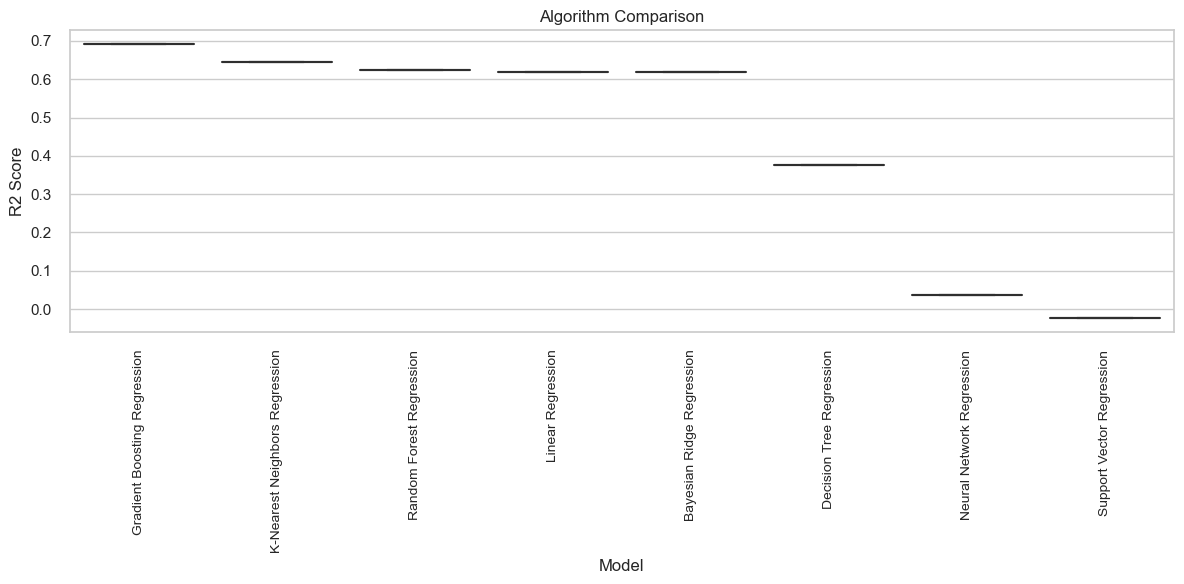

In [15]:
# Define the features and target variables
features = ['workingday','weather', 'temp', 'hour', 'humidity']
target = 'member'

# Filter the data for peak hours
peak_hours = [8, 17, 18]
peak_data = Bike_Sharing_hour_no_outliers[Bike_Sharing_hour_no_outliers['hour'].isin(peak_hours)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(peak_data[features], peak_data[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]

def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Provide prediction for a specific scenario during peak hours
        scenario_data = [[1, 2, 25, 8, 70], [1, 2, 25, 17, 70], [1, 2, 25, 18, 70]]
        scenario_prediction = model.predict(scenario_data)
        for i in range(len(scenario_data)):
            print(f'Predicted number of bikes for the scenario during peak hours (Hour: {scenario_data[i][3]}): {scenario_prediction[i]}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores for peak hours
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores for peak hours
for model, score in top_models[:10]:
    print(f"{model}: {score}")

# Plot the accuracy results of the models using seaborn boxplots
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Add grid lines to the plot
boxplot = sns.boxplot(x=[model[0] for model in top_models], y=[model[1] for model in top_models], palette="Blues")  # Use a different color palette

plt.title('Algorithm Comparison')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=90, fontsize=10)  # Rotate and adjust font size of x-axis tick labels

# Adjust the layout to prevent overlapping
plt.tight_layout()

plt.show()



Random Forest Regression:
R2 Score: 0.5382103029149936
MSE: 423.09589130160606
MAE: 15.655929283679283

Predicted number of bikes for the scenario during peak hours (Hour: 14): 33.971666666666664

Predicted number of bikes for the scenario during peak hours (Hour: 15): 32.99166666666667

Predicted number of bikes for the scenario during peak hours (Hour: 17): 31.225

Gradient Boosting Regression:
R2 Score: 0.5734350130962873
MSE: 390.8226936879058
MAE: 14.708955173092196

Predicted number of bikes for the scenario during peak hours (Hour: 14): 2.0756718210740184

Predicted number of bikes for the scenario during peak hours (Hour: 15): 2.0756718210740184

Predicted number of bikes for the scenario during peak hours (Hour: 17): 4.498667270770326

Support Vector Regression:
R2 Score: 0.04598945955885503
MSE: 874.0730736674954
MAE: 24.35525670914148

Predicted number of bikes for the scenario during peak hours (Hour: 14): 35.429317295551286

Predicted number of bikes for the scenario durin

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
/Users/nataliemac/opt/anaconda3/lib/

Neural Network Regression:
R2 Score: 0.32826381869757715
MSE: 615.450756354507
MAE: 19.855872585658776

Predicted number of bikes for the scenario during peak hours (Hour: 14): -492.66788878364315

Predicted number of bikes for the scenario during peak hours (Hour: 15): -493.058048362902

Predicted number of bikes for the scenario during peak hours (Hour: 17): -493.6924804809462

Linear Regression:
R2 Score: 0.41366850905782604
MSE: 537.2022076809416
MAE: 17.731957098052817

Predicted number of bikes for the scenario during peak hours (Hour: 14): 34.731621197181866

Predicted number of bikes for the scenario during peak hours (Hour: 15): 34.27540733506417

Predicted number of bikes for the scenario during peak hours (Hour: 17): 33.36297961082924

Decision Tree Regression:
R2 Score: 0.31280733916096937
MSE: 629.6121225071224
MAE: 18.811752136752137

Predicted number of bikes for the scenario during peak hours (Hour: 14): 17.0

Predicted number of bikes for the scenario during peak hours

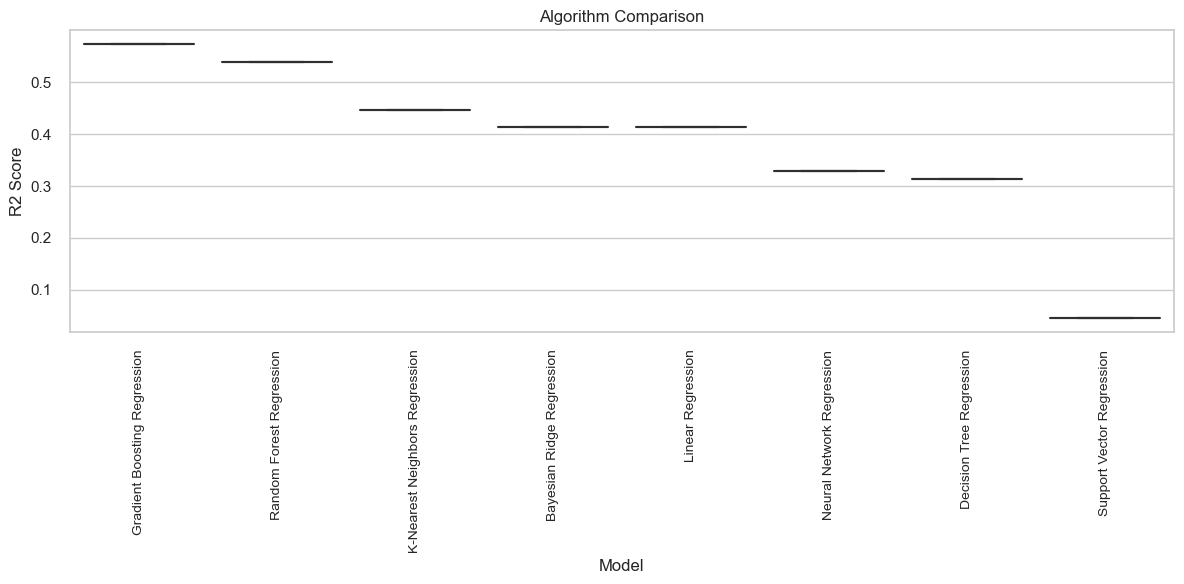

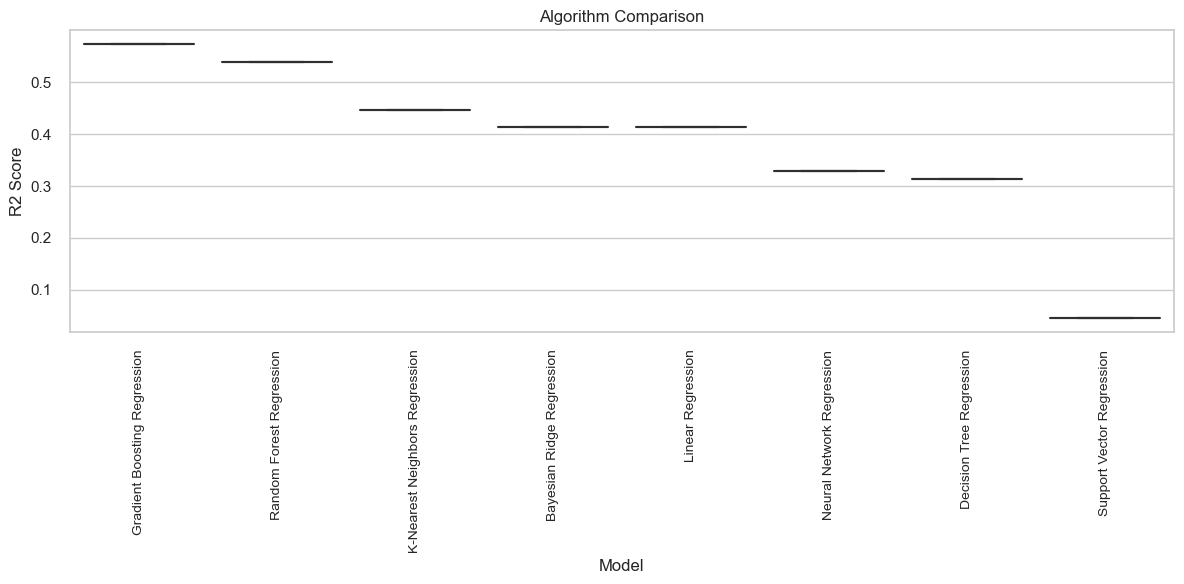

Random Forest Regression:
R2 Score: 0.5274534564109139
MSE: 432.95141122326515
MAE: 15.85687955100455

Predicted number of bikes for the scenario during peak hours (Hour: 14): 28.050666666666665

Predicted number of bikes for the scenario during peak hours (Hour: 15): 27.950666666666667

Predicted number of bikes for the scenario during peak hours (Hour: 17): 29.260666666666665

Gradient Boosting Regression:
R2 Score: 0.5734768967205892
MSE: 390.7843195330322
MAE: 14.703320544758771

Predicted number of bikes for the scenario during peak hours (Hour: 14): 4.299383105165538

Predicted number of bikes for the scenario during peak hours (Hour: 15): 4.299383105165538

Predicted number of bikes for the scenario during peak hours (Hour: 17): 6.722378554861848

Support Vector Regression:
R2 Score: 0.04598945955885503
MSE: 874.0730736674954
MAE: 24.35525670914148

Predicted number of bikes for the scenario during peak hours (Hour: 14): 35.429317295551286

Predicted number of bikes for the scen

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names


K-Nearest Neighbors Regression:
R2 Score: 0.4456531791041637
MSE: 507.89756410256405
MAE: 16.83782051282051

Predicted number of bikes for the scenario during peak hours (Hour: 14): 8.8

Predicted number of bikes for the scenario during peak hours (Hour: 15): 8.4

Predicted number of bikes for the scenario during peak hours (Hour: 17): 8.6



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/

Neural Network Regression:
R2 Score: 0.35979344794980717
MSE: 586.563025261568
MAE: 19.20893297616435

Predicted number of bikes for the scenario during peak hours (Hour: 14): -496.7124033982127

Predicted number of bikes for the scenario during peak hours (Hour: 15): -495.87784065304317

Predicted number of bikes for the scenario during peak hours (Hour: 17): -494.2087151627042

Linear Regression:
R2 Score: 0.41366850905782604
MSE: 537.2022076809416
MAE: 17.731957098052817

Predicted number of bikes for the scenario during peak hours (Hour: 14): 34.731621197181866

Predicted number of bikes for the scenario during peak hours (Hour: 15): 34.27540733506417

Predicted number of bikes for the scenario during peak hours (Hour: 17): 33.36297961082924

Decision Tree Regression:
R2 Score: 0.2989647640866192
MSE: 642.2948148148147
MAE: 19.004059829059827

Predicted number of bikes for the scenario during peak hours (Hour: 14): 17.0

Predicted number of bikes for the scenario during peak hours 

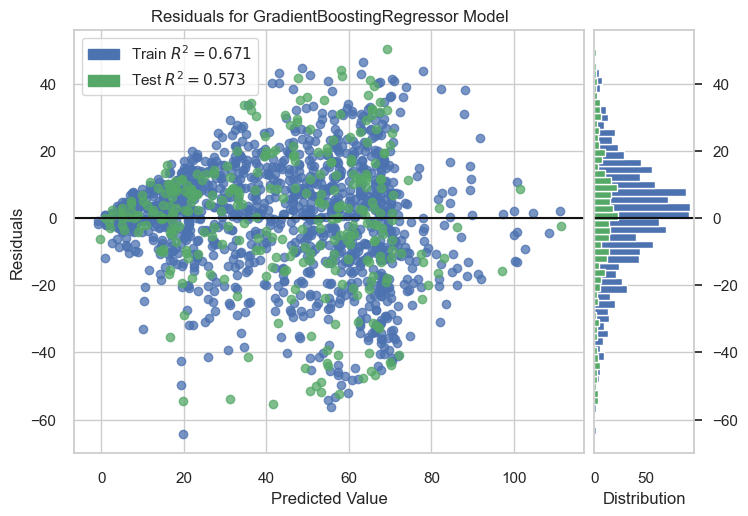

Model: Random Forest Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names


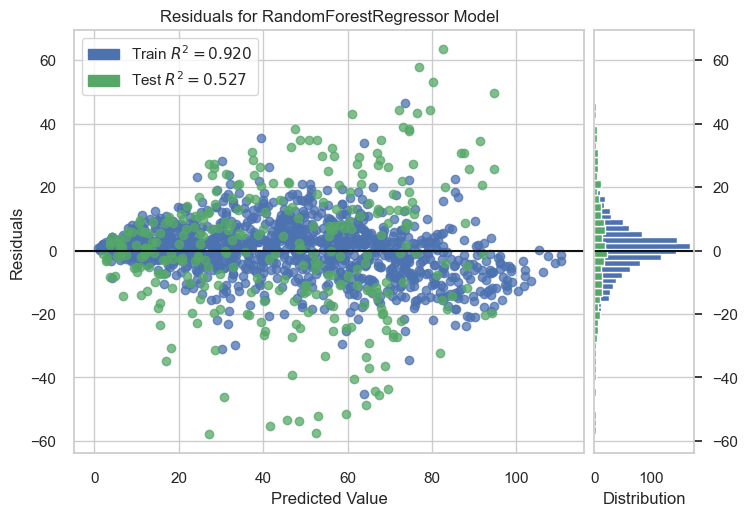

Model: K-Nearest Neighbors Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names


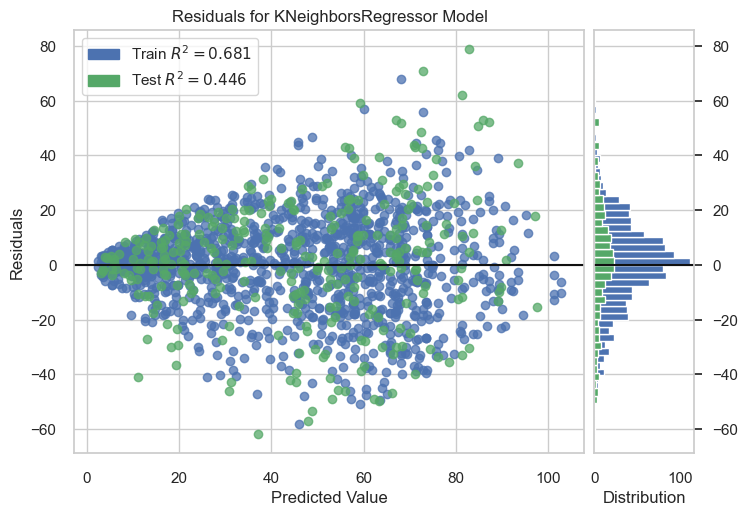

Model: Bayesian Ridge Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names


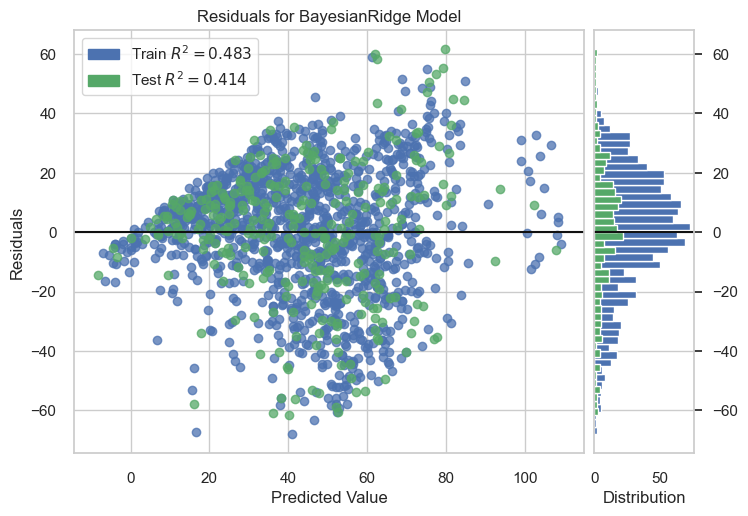

Model: Linear Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names


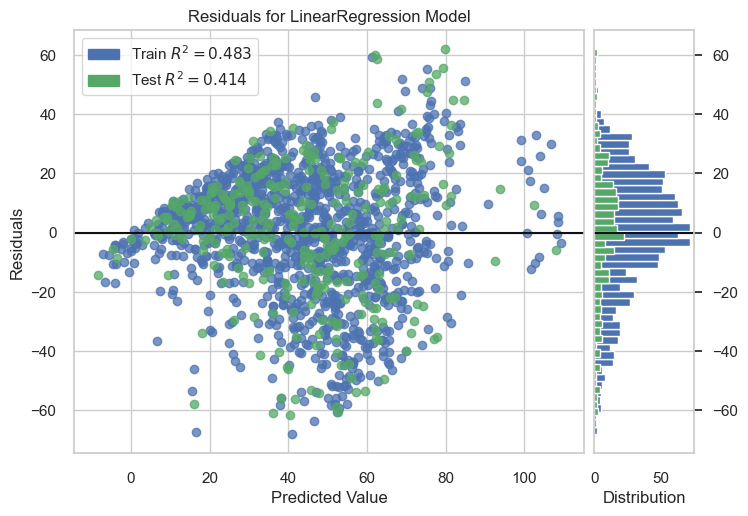

Model: Neural Network Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names


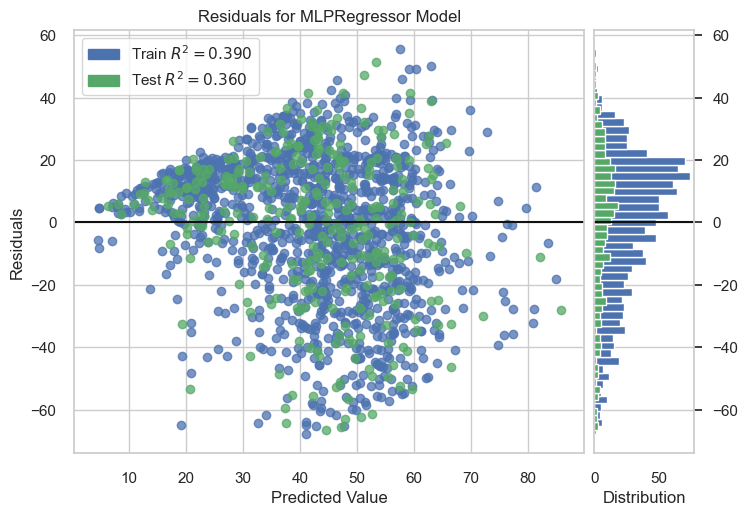

Model: Decision Tree Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


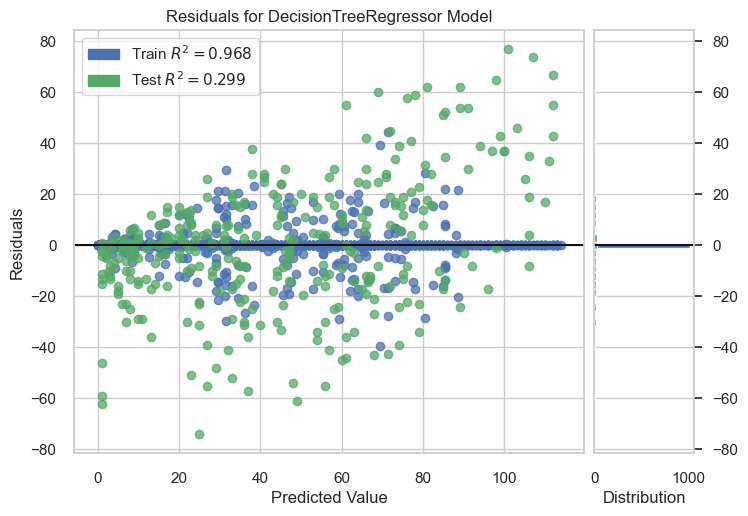

Model: Support Vector Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names


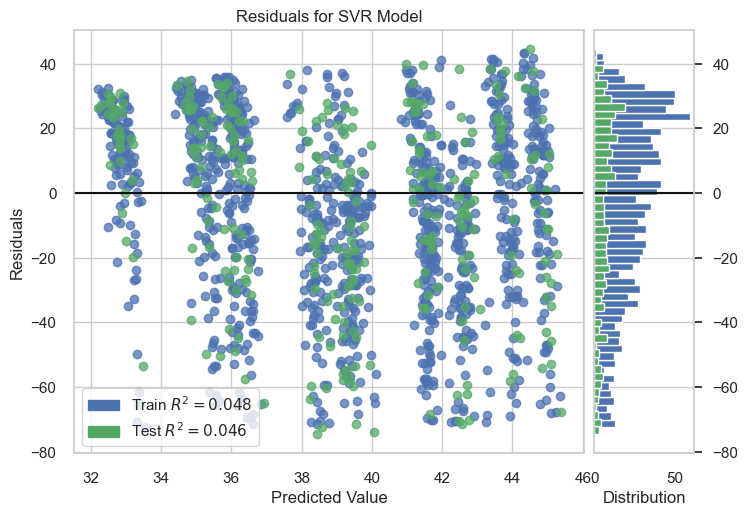

Model: Gradient Boosting Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names


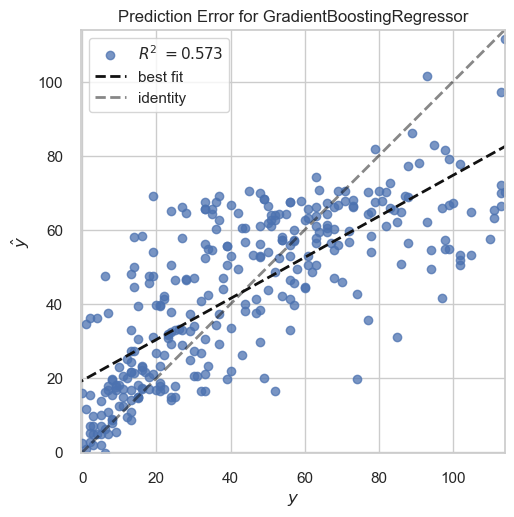

Model: Random Forest Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names


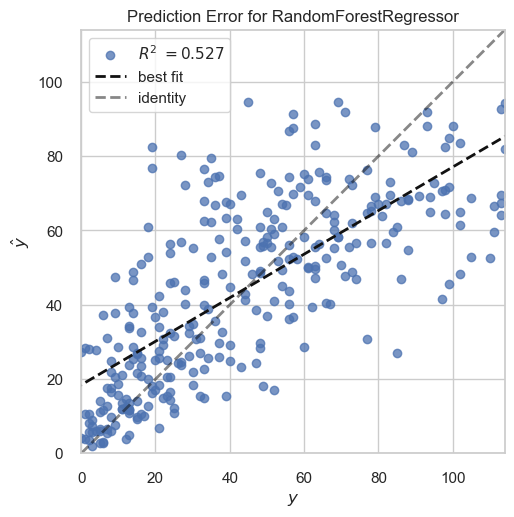

Model: K-Nearest Neighbors Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names


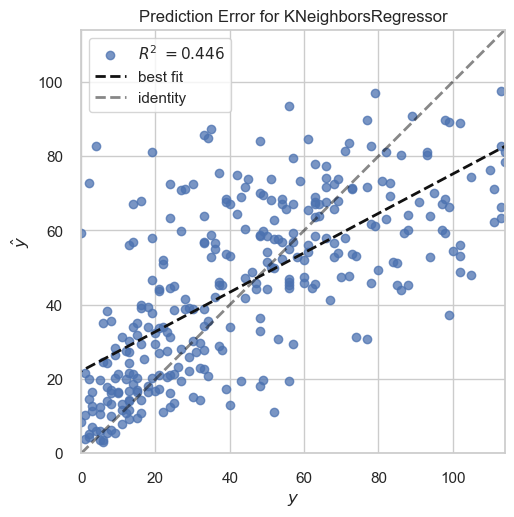

Model: Bayesian Ridge Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names


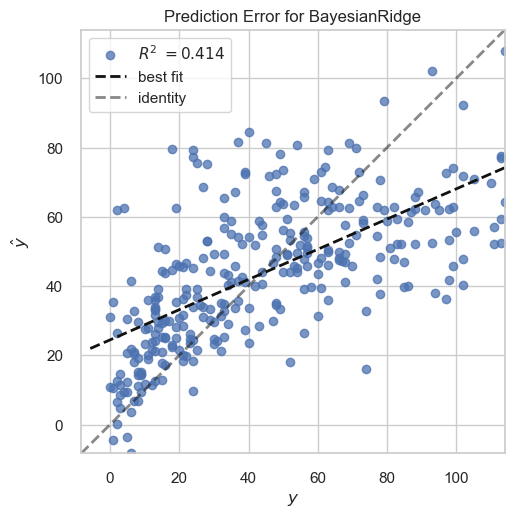

Model: Linear Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names


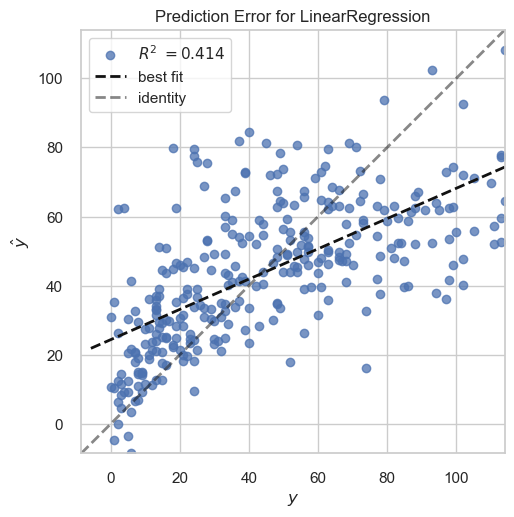

Model: Neural Network Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names


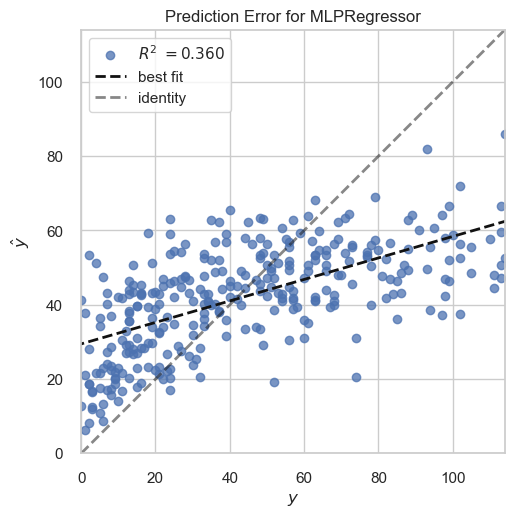

Model: Decision Tree Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


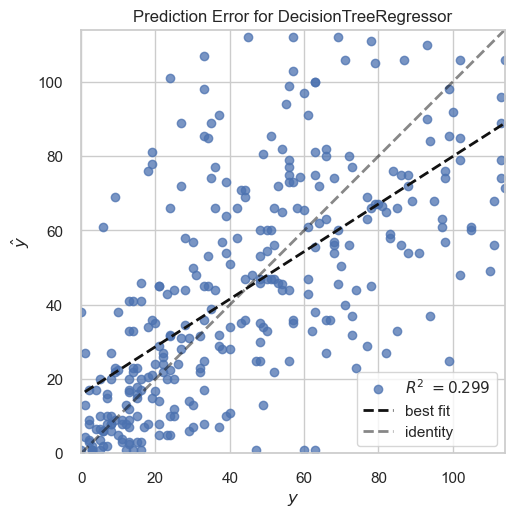

Model: Support Vector Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names


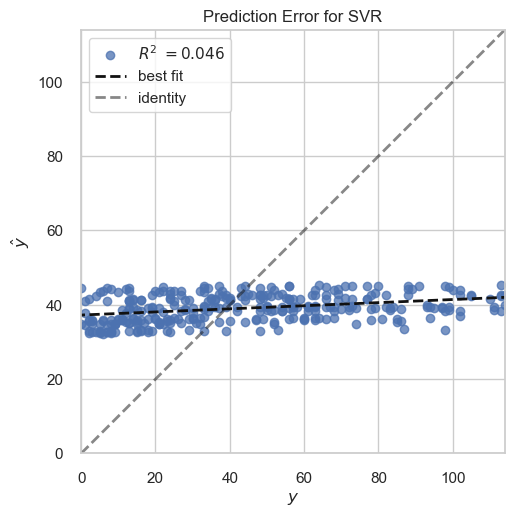

In [16]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Define the features and target variables
features = ['workingday', 'season', 'temp', 'hour', 'humidity']
target = 'non_member'

# Filter the data for peak hours
peak_hours = [14, 15, 17]
peak_data = Bike_Sharing_hour_no_outliers[Bike_Sharing_hour_no_outliers['hour'].isin(peak_hours)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(peak_data[features], peak_data[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]

def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Provide prediction for a specific scenario during peak hours
        scenario_data = [[0, 3, 25, 14, 70], [0, 3, 25, 15, 70], [0, 3, 25, 17, 70]]
        scenario_prediction = model.predict(scenario_data)
        for i in range(len(scenario_data)):
            print(f'Predicted number of bikes for the scenario during peak hours (Hour: {scenario_data[i][3]}): {scenario_prediction[i]}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores for peak hours
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores for peak hours
for model, score in top_models[:10]:
    print(f"{model}: {score}")

    # Plot the accuracy results of the models using seaborn boxplots
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Add grid lines to the plot
sns.boxplot(x=[model[0] for model in top_models], y=[model[1] for model in top_models], palette="Blues")  # Use a different color palette

plt.title('Algorithm Comparison')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=90, fontsize=10)  # Rotate and adjust font size of x-axis tick labels

plt.tight_layout()  # Adjust the layout to prevent overlapping

plt.show()

# Plot the accuracy results of the models using seaborn boxplots
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Add grid lines to the plot
boxplot = sns.boxplot(x=[model[0] for model in top_models], y=[model[1] for model in top_models], palette="Blues")  # Use a different color palette

plt.title('Algorithm Comparison')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=90, fontsize=10)  # Rotate and adjust font size of x-axis tick labels

# Adjust the layout to prevent overlapping
plt.tight_layout()

plt.show()


#Plotting residuals
# Get the top regression models
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Visualize the residuals for the top models
for name, r2_score in top_models:
    print(f"Model: {name}")
    model = next(model for model in models if model[0] == name)[1]

    residuals_plot = ResidualsPlot(model)
    residuals_plot.fit(X_train, y_train)
    residuals_plot.score(X_test, y_test)
    residuals_plot.show()


# Visualize the prediction errors for the top models
for name, r2_score in top_models:
    print(f"Model: {name}")
    model = next(model for model in models if model[0] == name)[1]

    # Plot the prediction error
    prediction_error = PredictionError(model)
    prediction_error.fit(X_train, y_train)
    prediction_error.score(X_test, y_test)
    prediction_error.show()


Random Forest Regression:
MSE: 422.1894930175068
MAE: 15.652378383190884

Gradient Boosting Regression:
MSE: 390.7843195330322
MAE: 14.703320544758771

Support Vector Regression:
MSE: 874.0730736674954
MAE: 24.35525670914148

K-Nearest Neighbors Regression:
MSE: 507.89756410256405
MAE: 16.83782051282051

Neural Network Regression:
MSE: 637.3087097069734
MAE: 20.413376031389642

Linear Regression:
MSE: 537.2022076809416
MAE: 17.731957098052817

Decision Tree Regression:
MSE: 616.2435007122507
MAE: 18.63514957264957

Bayesian Ridge Regression:
MSE: 536.9401290836704
MAE: 17.735603068224822

Gradient Boosting Regression:
MSE: 390.7843195330322
MAE: 14.703320544758771



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


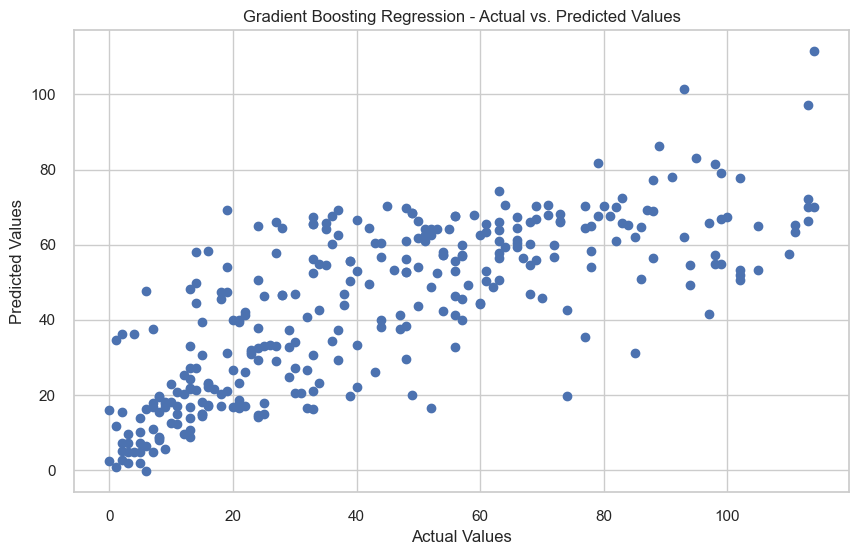

Random Forest Regression:
MSE: 422.1894930175068
MAE: 15.652378383190884



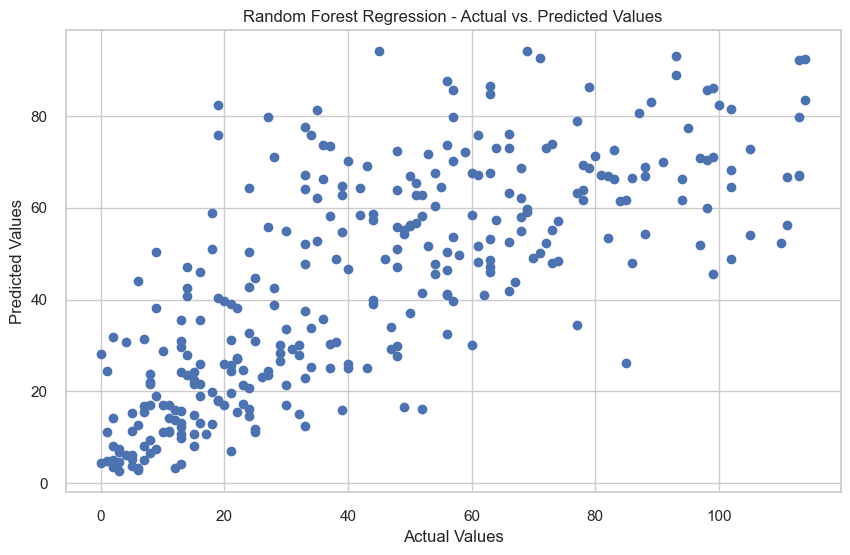

K-Nearest Neighbors Regression:
MSE: 507.89756410256405
MAE: 16.83782051282051



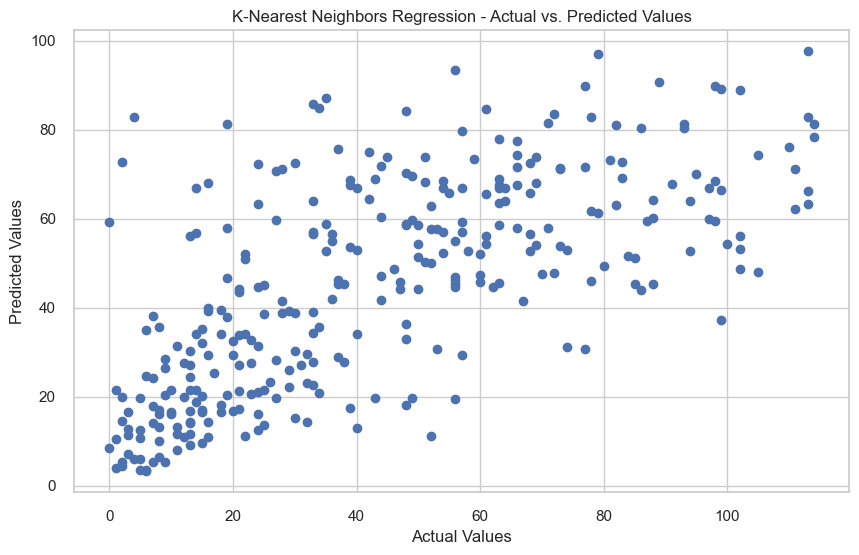

Bayesian Ridge Regression:
MSE: 536.9401290836704
MAE: 17.735603068224822



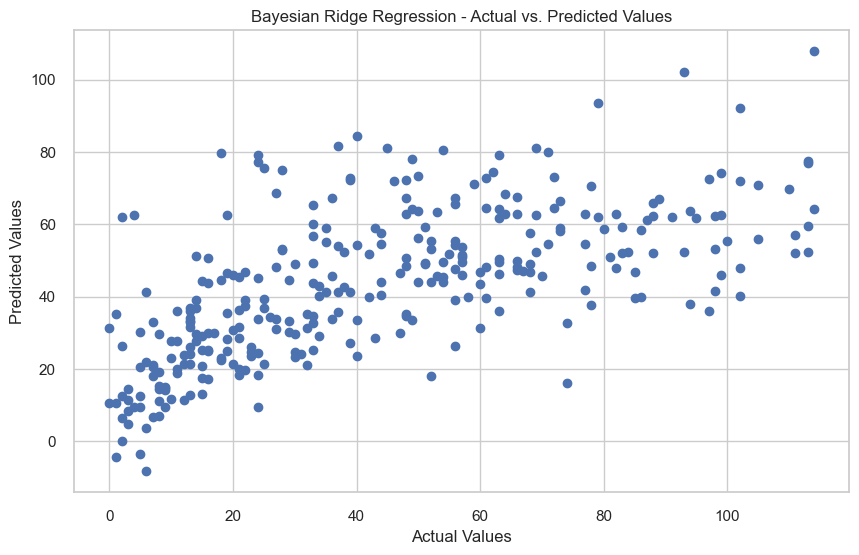

Linear Regression:
MSE: 537.2022076809416
MAE: 17.731957098052817



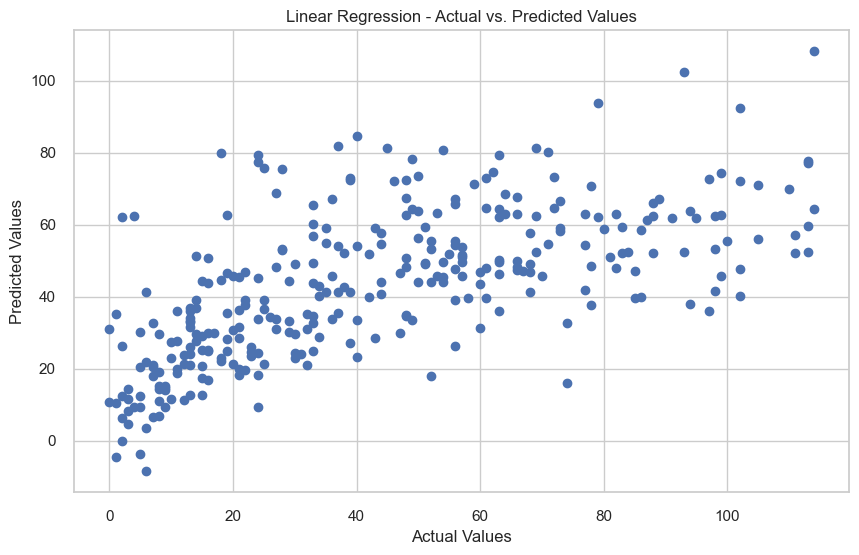

Decision Tree Regression:
MSE: 616.2435007122507
MAE: 18.63514957264957



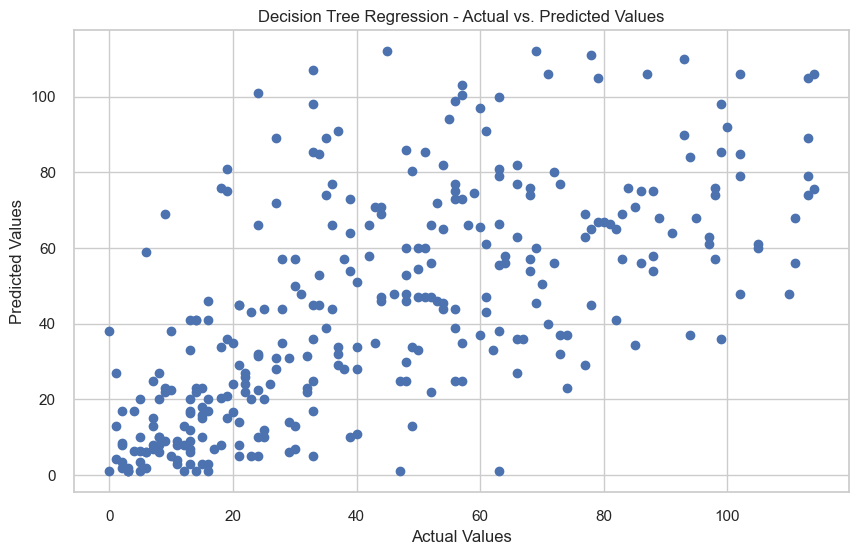

Neural Network Regression:
MSE: 637.3087097069734
MAE: 20.413376031389642



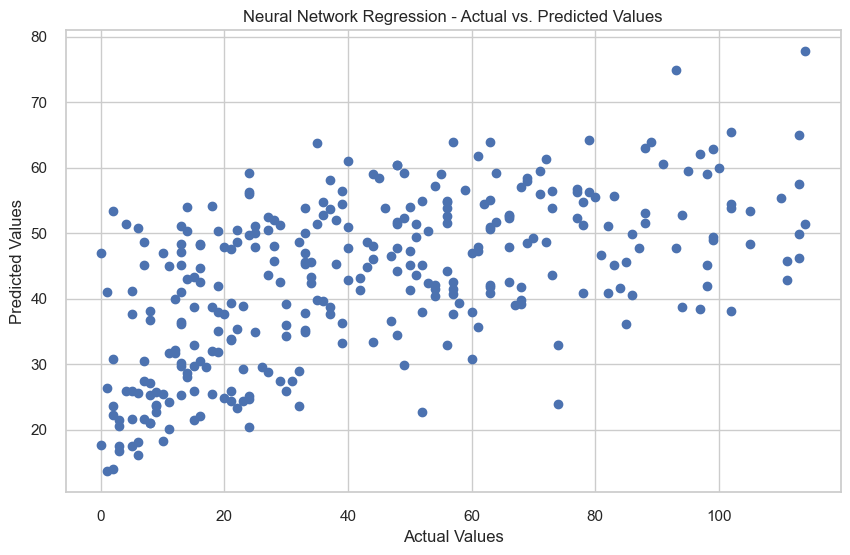

Support Vector Regression:
MSE: 874.0730736674954
MAE: 24.35525670914148



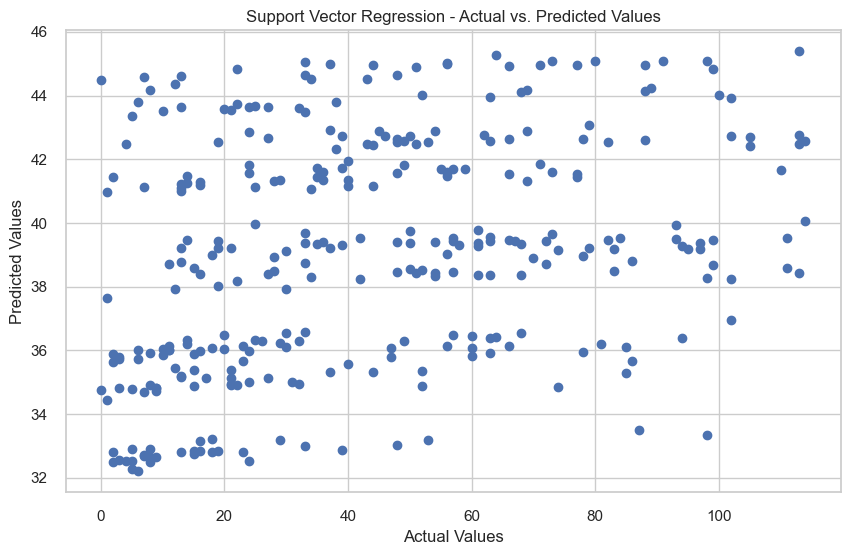

Random Forest Regression:
MSE: 425.6435681259823
MAE: 15.721383089133091

Gradient Boosting Regression:
MSE: 390.78431953303215
MAE: 14.703320544758771

Support Vector Regression:
MSE: 874.0730736674954
MAE: 24.35525670914148

K-Nearest Neighbors Regression:
MSE: 507.89756410256405
MAE: 16.83782051282051

Neural Network Regression:
MSE: 633.2856618816526
MAE: 20.27963659782049

Linear Regression:
MSE: 537.2022076809416
MAE: 17.731957098052817

Decision Tree Regression:
MSE: 635.9269943019943
MAE: 19.12713675213675

Bayesian Ridge Regression:
MSE: 536.9401290836704
MAE: 17.735603068224822



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


In [17]:

# Modify the top_regression_models function
def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Add the model and its scores to the top models list
        top_models.append((name, mse, mae, y_pred))
    
    # Sort the top models based on the MSE
    top_models = sorted(top_models, key=lambda x: x[1])
    
    return top_models

# Get the top regression models and their scores for peak hours
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores for peak hours
for model, mse, mae, y_pred in top_models[:10]:
    print(f"{model}:")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}\n")

    # Plot the predictions vs. actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f"{model} - Actual vs. Predicted Values")
    plt.show()


#Plotting residuals
# Get the top regression models
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)




Random Forest Regression:
R2 Score: 0.6065322522475637
MSE: 8426.643155368392
MAE: 65.70722100890715

Predicted number of bikes for the scenario during peak hours (Hour: 8): 320.26433333333335

Predicted number of bikes for the scenario during peak hours (Hour: 17): 168.22

Predicted number of bikes for the scenario during peak hours (Hour: 18): 187.3

Gradient Boosting Regression:
R2 Score: 0.6969623405790715
MSE: 6489.960697324815
MAE: 60.66061026826676

Predicted number of bikes for the scenario during peak hours (Hour: 8): 203.41920761428665

Predicted number of bikes for the scenario during peak hours (Hour: 17): 145.04929255528035

Predicted number of bikes for the scenario during peak hours (Hour: 18): 136.78590730889124

Support Vector Regression:
R2 Score: -0.019781883548767087
MSE: 21840.00614551436
MAE: 127.62178311969711

Predicted number of bikes for the scenario during peak hours (Hour: 8): 218.3510697185993

Predicted number of bikes for the scenario during peak hours (H

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
/Users/nataliemac/opt/anaconda3/lib/

Neural Network Regression:
R2 Score: 0.2094910530275106
MSE: 16929.816599490157
MAE: 114.74689262596104

Predicted number of bikes for the scenario during peak hours (Hour: 8): 1840.1111886062802

Predicted number of bikes for the scenario during peak hours (Hour: 17): 1948.2847817186346

Predicted number of bikes for the scenario during peak hours (Hour: 18): 1960.3040698422296

Linear Regression:
R2 Score: 0.6161502081719957
MSE: 8220.661641198027
MAE: 71.91301712564899

Predicted number of bikes for the scenario during peak hours (Hour: 8): -3516.109648047918

Predicted number of bikes for the scenario during peak hours (Hour: 17): -3519.235901819762

Predicted number of bikes for the scenario during peak hours (Hour: 18): -3519.5832633499667

Decision Tree Regression:
R2 Score: 0.4645389531425266
MSE: 11467.621402877698
MAE: 73.92985611510791

Predicted number of bikes for the scenario during peak hours (Hour: 8): 261.0

Predicted number of bikes for the scenario during peak hours 

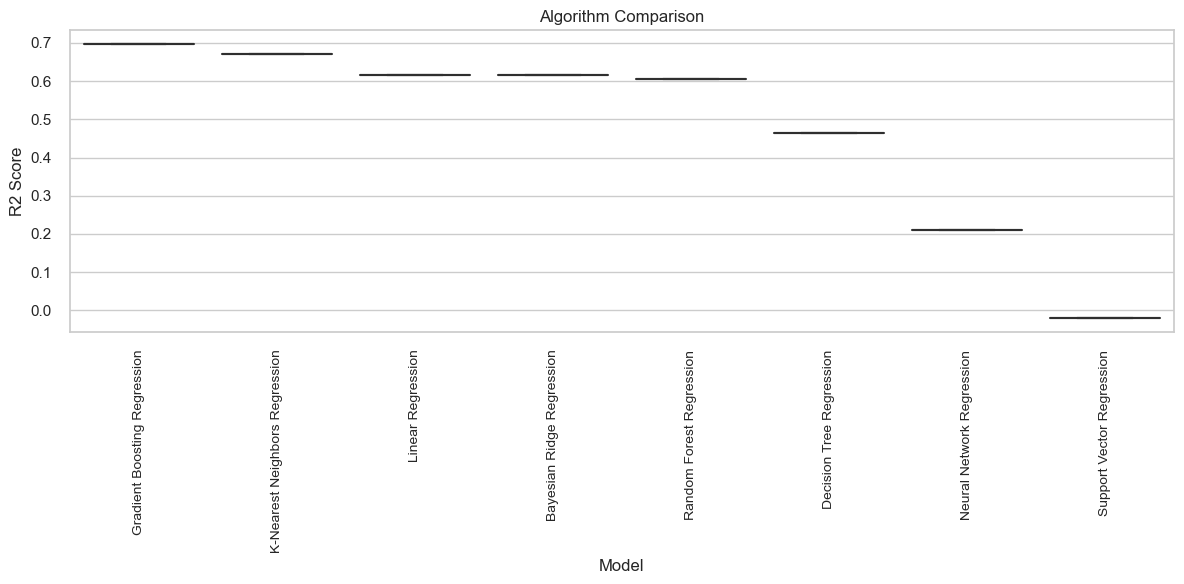

Random Forest Regression:
R2 Score: 0.6133429127343148
MSE: 8280.783663956332
MAE: 65.16508797247917

Predicted number of bikes for the scenario during peak hours (Hour: 8): 311.91921428571425

Predicted number of bikes for the scenario during peak hours (Hour: 17): 169.46

Predicted number of bikes for the scenario during peak hours (Hour: 18): 170.74

Gradient Boosting Regression:
R2 Score: 0.696204672521033
MSE: 6506.187181939577
MAE: 60.71686630705469

Predicted number of bikes for the scenario during peak hours (Hour: 8): 195.9914794398872

Predicted number of bikes for the scenario during peak hours (Hour: 17): 137.6215643808809

Predicted number of bikes for the scenario during peak hours (Hour: 18): 136.78590730889113

Support Vector Regression:
R2 Score: -0.019781883548767087
MSE: 21840.00614551436
MAE: 127.62178311969711

Predicted number of bikes for the scenario during peak hours (Hour: 8): 218.3510697185993

Predicted number of bikes for the scenario during peak hours (Hou

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
/Users/nataliemac/opt/anaconda3/lib/

Neural Network Regression:
R2 Score: 0.17081134047057944
MSE: 17758.194876823723
MAE: 117.91778145728104

Predicted number of bikes for the scenario during peak hours (Hour: 8): 1878.7570153213624

Predicted number of bikes for the scenario during peak hours (Hour: 17): 1980.2798991992072

Predicted number of bikes for the scenario during peak hours (Hour: 18): 1991.4424080833298

Linear Regression:
R2 Score: 0.6161502081719957
MSE: 8220.661641198027
MAE: 71.91301712564899

Predicted number of bikes for the scenario during peak hours (Hour: 8): -3516.109648047918

Predicted number of bikes for the scenario during peak hours (Hour: 17): -3519.235901819762

Predicted number of bikes for the scenario during peak hours (Hour: 18): -3519.5832633499667

Decision Tree Regression:
R2 Score: 0.4692485515664977
MSE: 11366.758992805755
MAE: 73.28776978417267

Predicted number of bikes for the scenario during peak hours (Hour: 8): 261.0

Predicted number of bikes for the scenario during peak hours

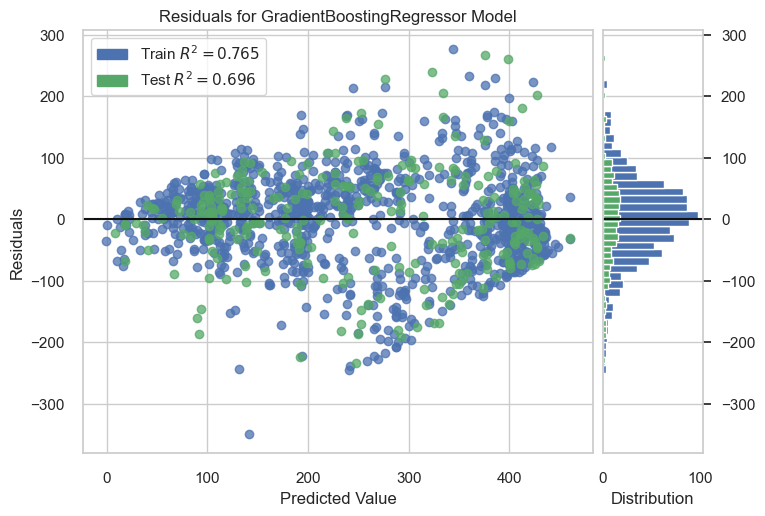

Model: K-Nearest Neighbors Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names


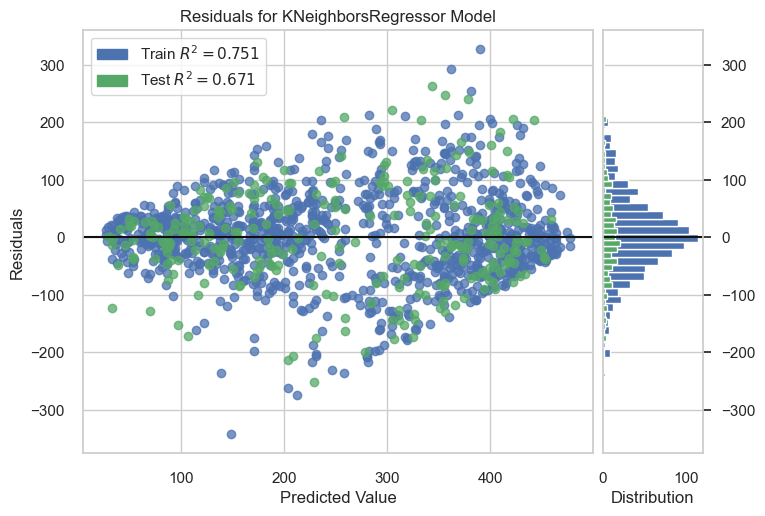

Model: Linear Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names


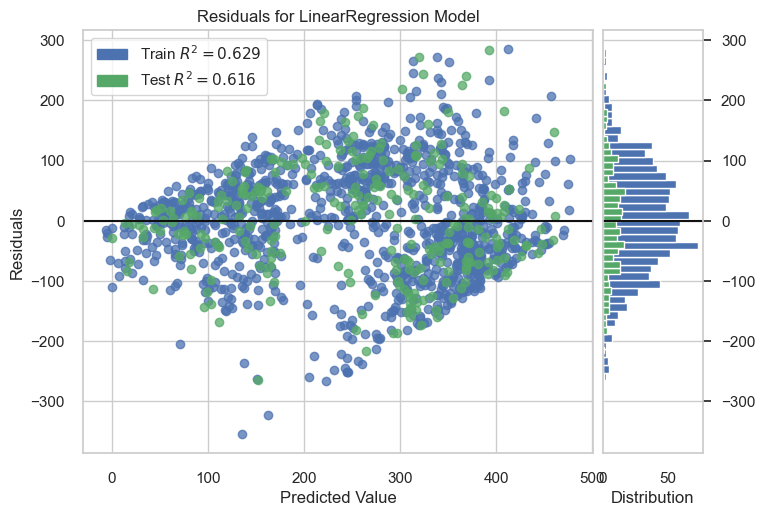

Model: Bayesian Ridge Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names


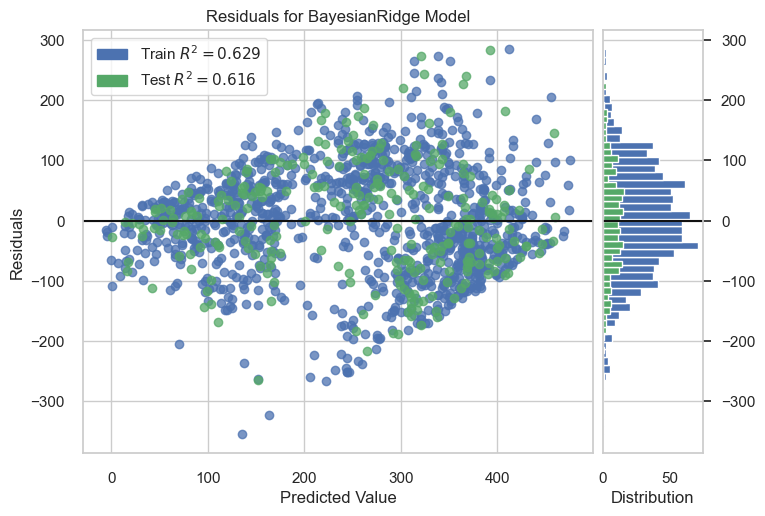

Model: Random Forest Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names


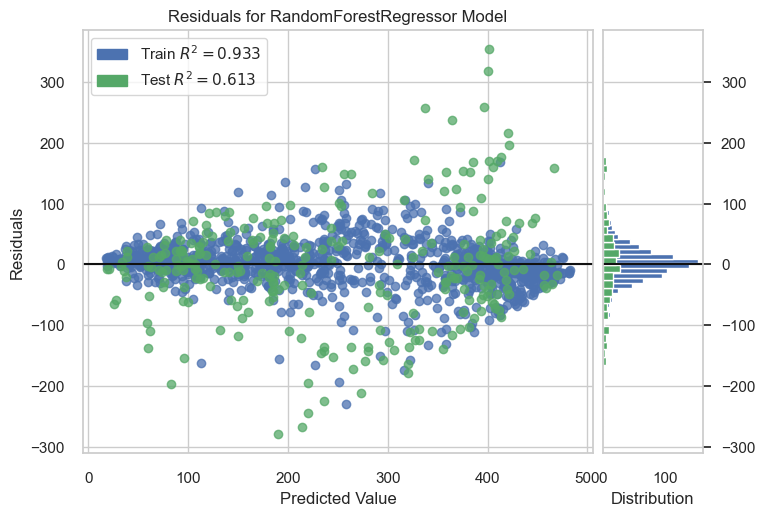

Model: Decision Tree Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


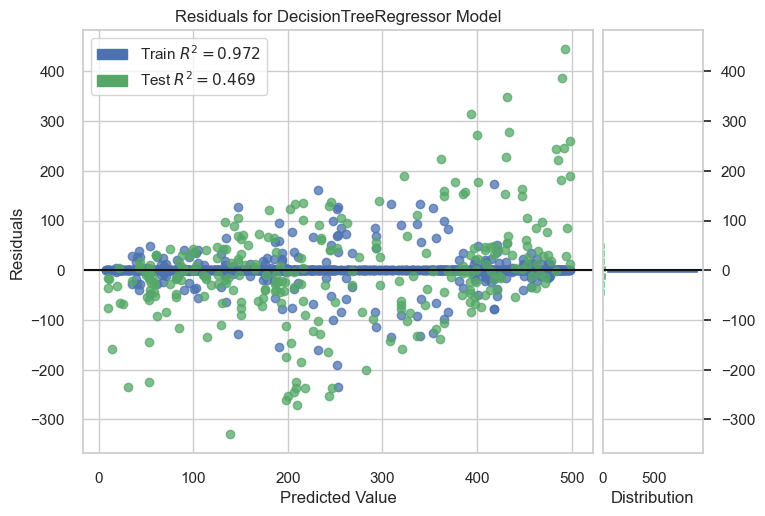

Model: Neural Network Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names


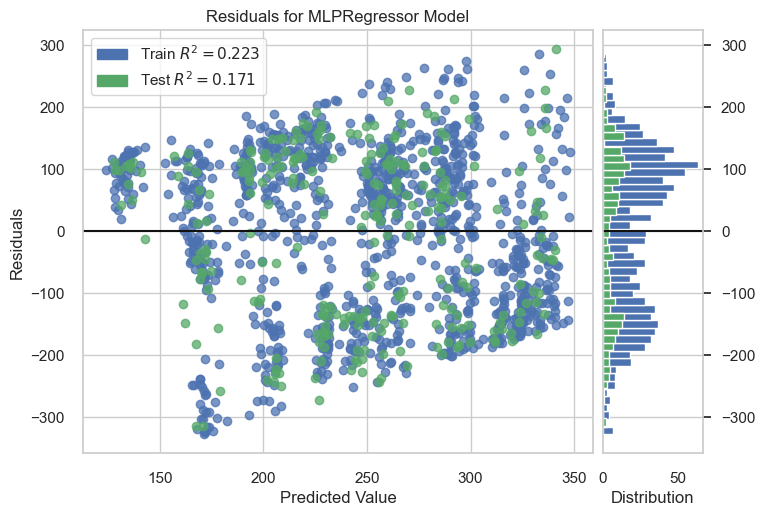

Model: Support Vector Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names


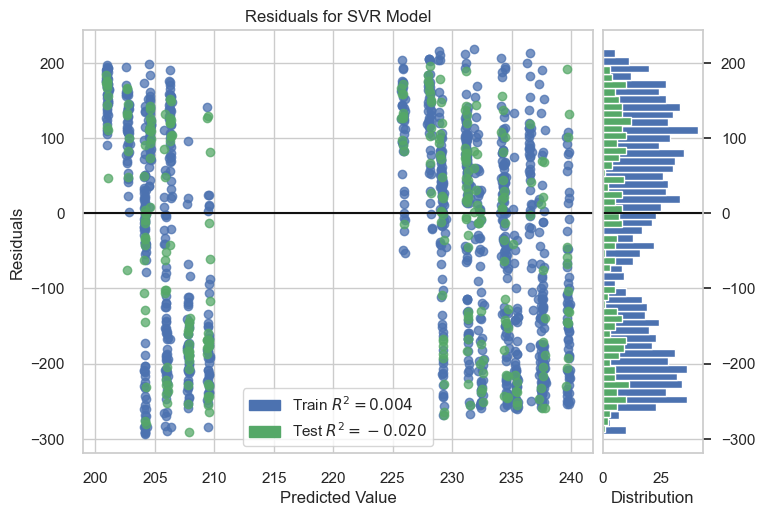

In [28]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# Define the features and target variables
features = ['workingday', 'season', 'temp', 'hour', 'humidity']
target = 'member'

# Filter the data for peak hours
peak_hours = [8, 17, 18]
peak_data = Bike_Sharing_hour_no_outliers[Bike_Sharing_hour_no_outliers['hour'].isin(peak_hours)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(peak_data[features], peak_data[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]

def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Provide prediction for a specific scenario during peak hours
        scenario_data = [[1, 3, 25, 8, 70], [1, 3, 25, 17, 70], [1, 3, 25, 18, 70]]
        scenario_prediction = model.predict(scenario_data)
        for i in range(len(scenario_data)):
            print(f'Predicted number of bikes for the scenario during peak hours (Hour: {scenario_data[i][3]}): {scenario_prediction[i]}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores for peak hours
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores for peak hours
for model, score in top_models[:10]:
    print(f"{model}: {score}")

# Plot the accuracy results of the models using seaborn boxplots
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Add grid lines to the plot
boxplot = sns.boxplot(x=[model[0] for model in top_models], y=[model[1] for model in top_models], palette="Blues")  # Use a different color palette

plt.title('Algorithm Comparison')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=90, fontsize=10)  # Rotate and adjust font size of x-axis tick labels

# Adjust the layout to prevent overlapping
plt.tight_layout()

plt.show()

#Plotting residuals
# Get the top regression models
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Visualize the residuals for the top models
for name, r2_score in top_models:
    print(f"Model: {name}")
    model = next(model for model in models if model[0] == name)[1]

    residuals_plot = ResidualsPlot(model)
    residuals_plot.fit(X_train, y_train)
    residuals_plot.score(X_test, y_test)
    residuals_plot.show()


Random Forest Regression:
R2 Score: 0.7006513192558507
MSE: 222.37804890047784
MAE: 9.621706329741402

Predicted number of bikes for the scenario during peak hours (Hour: 8): 21.4

Predicted number of bikes for the scenario during peak hours (Hour: 17): 21.4

Predicted number of bikes for the scenario during peak hours (Hour: 18): 21.4

Gradient Boosting Regression:
R2 Score: 0.736869056895499
MSE: 195.4728699236642
MAE: 9.29900441585396

Predicted number of bikes for the scenario during peak hours (Hour: 8): 1.6883099472400436

Predicted number of bikes for the scenario during peak hours (Hour: 17): 1.6883099472400436

Predicted number of bikes for the scenario during peak hours (Hour: 18): 1.6883099472400436

Support Vector Regression:
R2 Score: 0.047676497054390476
MSE: 707.4554061192473
MAE: 20.27085151709564

Predicted number of bikes for the scenario during peak hours (Hour: 8): 22.03474378583919

Predicted number of bikes for the scenario during peak hours (Hour: 17): 22.0347437

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
/Users/nataliemac/opt/anaconda3/lib/

Neural Network Regression:
R2 Score: 0.38551789500946676
MSE: 456.4821573703364
MAE: 16.241296055140985

Predicted number of bikes for the scenario during peak hours (Hour: 8): -329.094320009425

Predicted number of bikes for the scenario during peak hours (Hour: 17): -342.22613755733335

Predicted number of bikes for the scenario during peak hours (Hour: 18): -343.6852283959898

Linear Regression:
R2 Score: 0.568870637436772
MSE: 320.27435775626407
MAE: 13.28380381016743

Predicted number of bikes for the scenario during peak hours (Hour: 8): -205.41821596205463

Predicted number of bikes for the scenario during peak hours (Hour: 17): -352.96914647736384

Predicted number of bikes for the scenario during peak hours (Hour: 18): -369.3636943123982

Decision Tree Regression:
R2 Score: 0.5102457677768985
MSE: 363.8251898481215
MAE: 12.544364508393285

Predicted number of bikes for the scenario during peak hours (Hour: 8): 2.0

Predicted number of bikes for the scenario during peak hours (

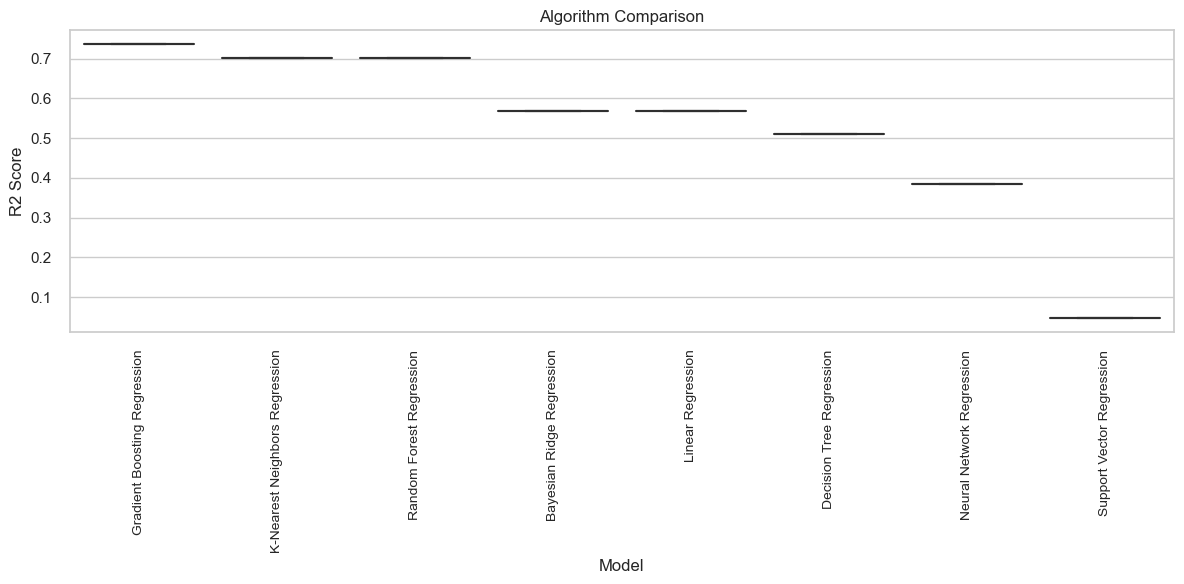

Random Forest Regression:
R2 Score: 0.6959234421907625
MSE: 225.89026106243563
MAE: 9.821275094210344

Predicted number of bikes for the scenario during peak hours (Hour: 8): 25.54333333333333

Predicted number of bikes for the scenario during peak hours (Hour: 17): 25.54333333333333

Predicted number of bikes for the scenario during peak hours (Hour: 18): 25.54333333333333

Gradient Boosting Regression:
R2 Score: 0.7356403749357153
MSE: 196.38562456235735
MAE: 9.3167297080446

Predicted number of bikes for the scenario during peak hours (Hour: 8): 1.6883099472400498

Predicted number of bikes for the scenario during peak hours (Hour: 17): 1.6883099472400498

Predicted number of bikes for the scenario during peak hours (Hour: 18): 1.6883099472400498

Support Vector Regression:
R2 Score: 0.047676497054390476
MSE: 707.4554061192473
MAE: 20.27085151709564

Predicted number of bikes for the scenario during peak hours (Hour: 8): 22.03474378583919

Predicted number of bikes for the scenario 

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
/Users/nataliemac/opt/anaconda3/lib/

Neural Network Regression:
R2 Score: 0.3637599103516729
MSE: 472.6455764446371
MAE: 16.67293117121962

Predicted number of bikes for the scenario during peak hours (Hour: 8): -319.71492106681023

Predicted number of bikes for the scenario during peak hours (Hour: 17): -337.8454082782719

Predicted number of bikes for the scenario during peak hours (Hour: 18): -339.81223231671424

Linear Regression:
R2 Score: 0.568870637436772
MSE: 320.27435775626407
MAE: 13.28380381016743

Predicted number of bikes for the scenario during peak hours (Hour: 8): -205.41821596205463

Predicted number of bikes for the scenario during peak hours (Hour: 17): -352.96914647736384

Predicted number of bikes for the scenario during peak hours (Hour: 18): -369.3636943123982

Decision Tree Regression:
R2 Score: 0.5279850822598351
MSE: 350.6471322941647
MAE: 12.55515587529976

Predicted number of bikes for the scenario during peak hours (Hour: 8): 2.0

Predicted number of bikes for the scenario during peak hours (H

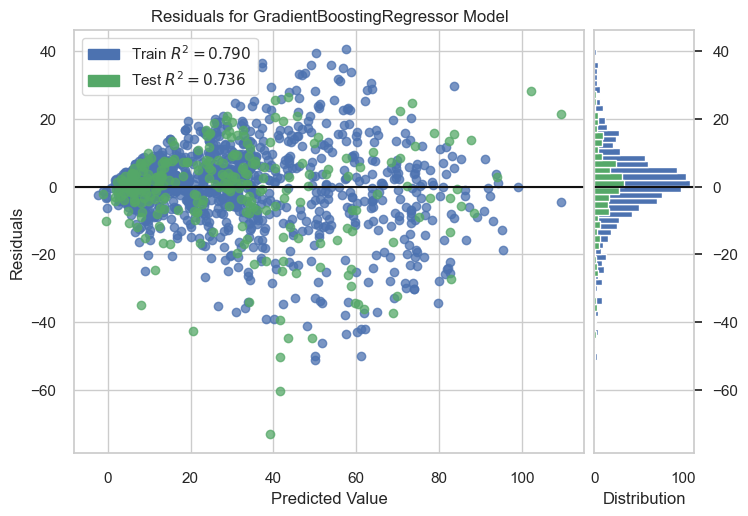

Model: K-Nearest Neighbors Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names


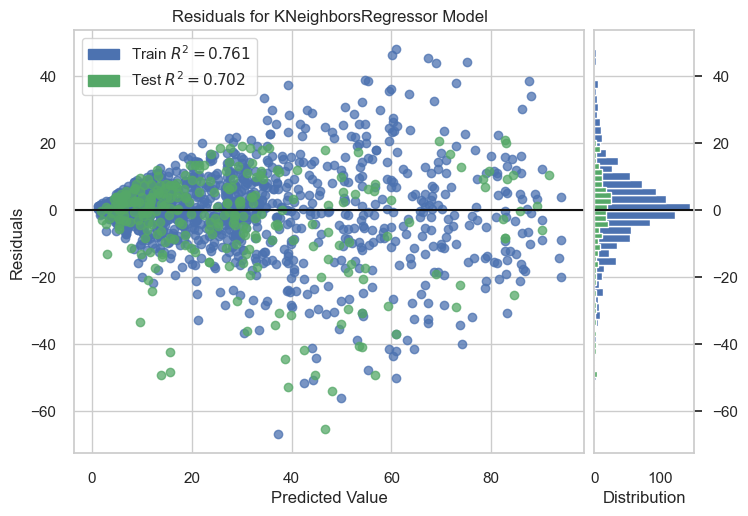

Model: Random Forest Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names


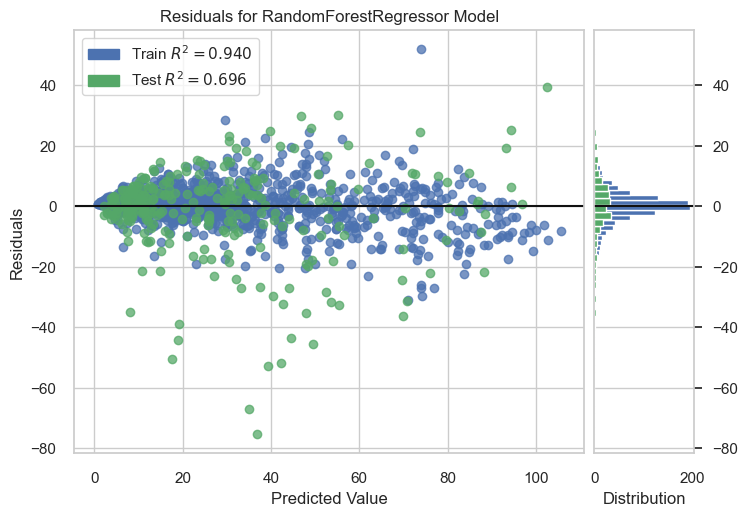

Model: Bayesian Ridge Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names


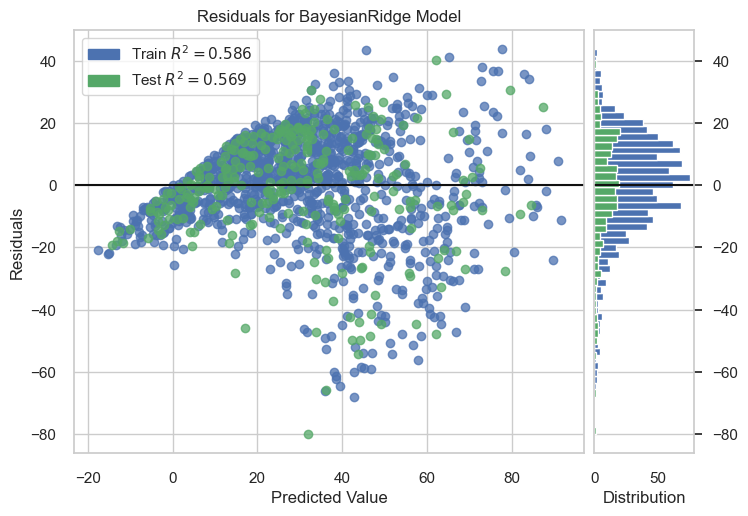

Model: Linear Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names


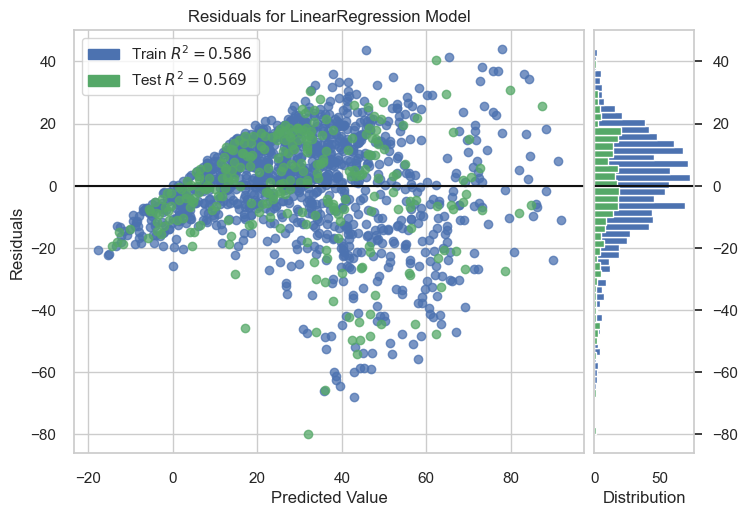

Model: Decision Tree Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


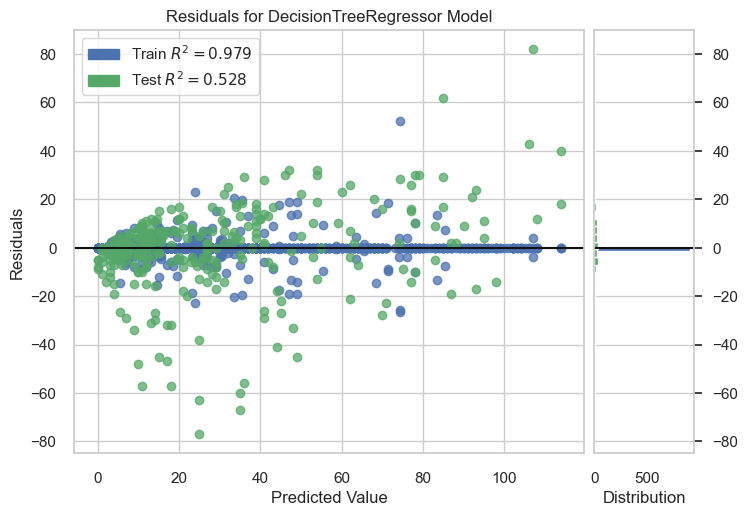

Model: Neural Network Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names


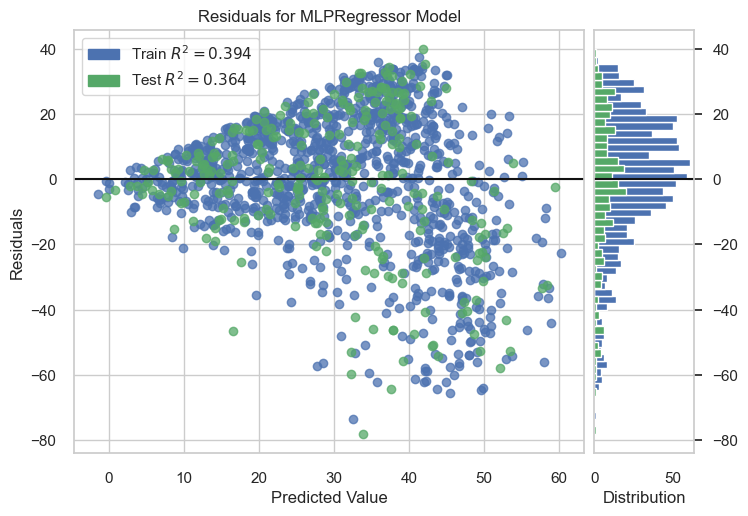

Model: Support Vector Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names


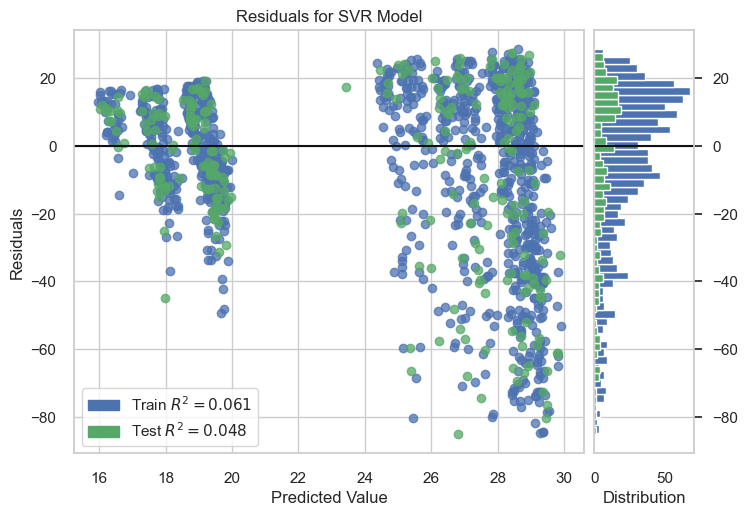

In [27]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Define the features and target variables
features = ['workingday', 'temp', 'hour', 'humidity','weather']
target = 'non_member'

# Filter the data for peak hours
peak_hours = [8, 17, 18]
peak_data = Bike_Sharing_hour_no_outliers[Bike_Sharing_hour_no_outliers['hour'].isin(peak_hours)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(peak_data[features], peak_data[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]

def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        # r2 = 1
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Provide prediction for a specific scenario during peak hours
        scenario_data = [[1, 2, 25, 8, 70], [1, 2, 25, 17, 70], [1, 2, 25, 18, 70]]
        scenario_prediction = model.predict(scenario_data)
        for i in range(len(scenario_data)):
            print(f'Predicted number of bikes for the scenario during peak hours (Hour: {scenario_data[i][3]}): {scenario_prediction[i]}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores for peak hours
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores for peak hours
for model, score in top_models[:10]:
    print(f"{model}: {score}")

# Plot the accuracy results of the models using seaborn boxplots
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Add grid lines to the plot
boxplot = sns.boxplot(x=[model[0] for model in top_models], y=[model[1] for model in top_models], palette="Blues")  # Use a different color palette

plt.title('Algorithm Comparison')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=90, fontsize=10)  # Rotate and adjust font size of x-axis tick labels

# Adjust the layout to prevent overlapping
plt.tight_layout()

plt.show()

#Plotting residuals
# Get the top regression models
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Visualize the residuals for the top models
for name, r2_score in top_models:
    print(f"Model: {name}")
    model = next(model for model in models if model[0] == name)[1]

    residuals_plot = ResidualsPlot(model)
    residuals_plot.fit(X_train, y_train)
    residuals_plot.score(X_test, y_test)
    residuals_plot.show()



/var/folders/3q/b6hzz54s5l766kwylwkwvjn00000gn/T/ipykernel_53288/207748005.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Random Forest Regression:
R2 Score: 0.30399409144676504
MSE: 637.6868996631331
MAE: 19.222869034900288

Gradient Boosting Regression:
R2 Score: 0.3695802072802784
MSE: 577.5963079700867
MAE: 18.261752873056693

Support Vector Regression:
R2 Score: 0.023522841339453704
MSE: 894.657192196066
MAE: 24.929090086714506

K-Nearest Neighbors Regression:
R2 Score: 0.26783195645055535
MSE: 670.8189743589744
MAE: 19.86153846153846



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Neural Network Regression:
R2 Score: 0.25514232317899244
MSE: 682.445330973713
MAE: 20.96882445476481

Linear Regression:
R2 Score: 0.3016429197661662
MSE: 639.8410643924145
MAE: 19.818668506598268

Decision Tree Regression:
R2 Score: -0.009591147418360979
MSE: 924.9965277777776
MAE: 22.328525641025642

Bayesian Ridge Regression:
R2 Score: 0.3020284746000029
MSE: 639.4878155713657
MAE: 19.829782358585298

Gradient Boosting Regression: 0.3695802072802784
Random Forest Regression: 0.30399409144676504
Bayesian Ridge Regression: 0.3020284746000029
Linear Regression: 0.3016429197661662
K-Nearest Neighbors Regression: 0.26783195645055535
Neural Network Regression: 0.25514232317899244
Support Vector Regression: 0.023522841339453704
Decision Tree Regression: -0.009591147418360979


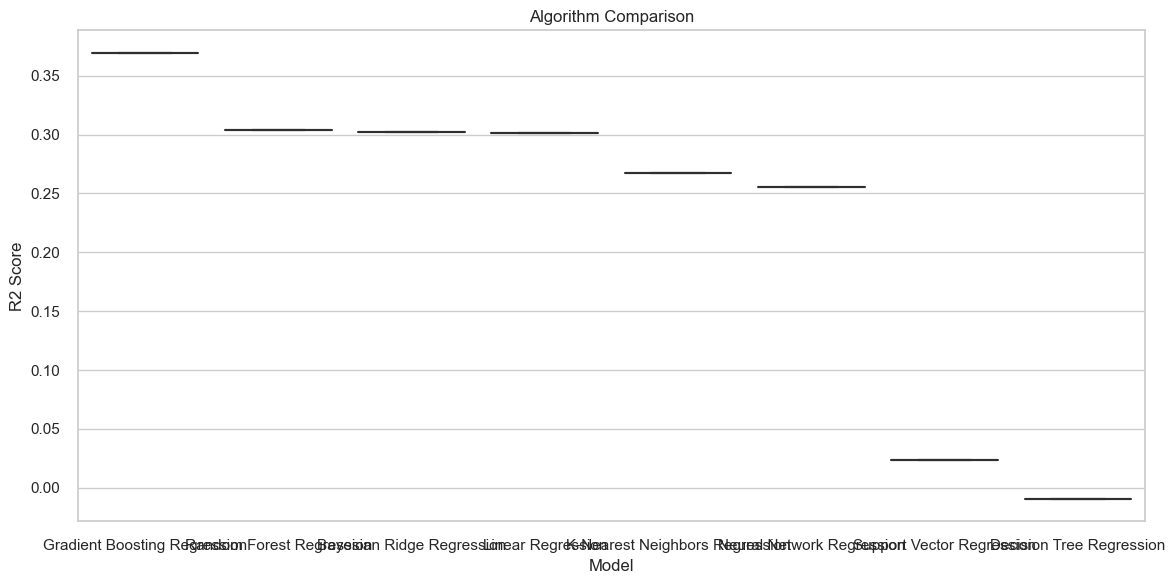

Random Forest Regression:
R2 Score: 0.2938928065219587
MSE: 646.9417881449039
MAE: 19.35232274091649

Gradient Boosting Regression:
R2 Score: 0.36905053082460526
MSE: 578.0816023227524
MAE: 18.26774514024517

Support Vector Regression:
R2 Score: 0.023522841339453704
MSE: 894.657192196066
MAE: 24.929090086714506

K-Nearest Neighbors Regression:
R2 Score: 0.26783195645055535
MSE: 670.8189743589744
MAE: 19.86153846153846

Neural Network Regression:
R2 Score: 0.21382339392099958
MSE: 720.3021071477827
MAE: 21.99806882690985

Linear Regression:
R2 Score: 0.3016429197661662
MSE: 639.8410643924145
MAE: 19.818668506598268

Decision Tree Regression:
R2 Score: 0.006783286061362137
MSE: 909.9941239316238
MAE: 21.900641025641026

Bayesian Ridge Regression:
R2 Score: 0.3020284746000029
MSE: 639.4878155713657
MAE: 19.829782358585298



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Define the features and target variables
features = ['workingday', 'temp', 'hour', 'humidity', 'weather']
target = 'non_member'

# Filter the data for peak hours
peak_hours = [14, 15, 17]
peak_data = Bike_Sharing_hour_no_outliers[Bike_Sharing_hour_no_outliers['hour'].isin(peak_hours)]
peak_data['workingday'] = 0  # Set workingday feature to 0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(peak_data[features], peak_data[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]

def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores for peak hours
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores for peak hours
for model, score in top_models[:10]:
    print(f"{model}: {score}")

# Plot the accuracy results of the models using seaborn boxplots
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Add grid lines to the plot
boxplot = sns.boxplot(x=[model[0] for model in top_models], y=[model[1] for model in top_models], palette="Blues")  # Use a different color palette

plt.title('Algorithm Comparison')
plt.xlabel('Model')
plt.ylabel('R2 Score')

# Adjust the layout to prevent overlapping
plt.tight_layout()

plt.show()

# Plotting residuals
# Get the top regression models
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)



Random Forest Regression:
R2 Score: 0.6458354222291043
MSE: 7584.91269537244
MAE: 63.871087912786656

Predicted number of bikes for the scenario during peak hours (Hour: 8): 117.355

Predicted number of bikes for the scenario during peak hours (Hour: 17): 117.355

Predicted number of bikes for the scenario during peak hours (Hour: 18): 117.355

Gradient Boosting Regression:
R2 Score: 0.6921569160541666
MSE: 6592.875352751428
MAE: 62.65770563079729

Predicted number of bikes for the scenario during peak hours (Hour: 8): 86.75751566906055

Predicted number of bikes for the scenario during peak hours (Hour: 17): 86.75751566906055

Predicted number of bikes for the scenario during peak hours (Hour: 18): 86.75751566906055

Support Vector Regression:
R2 Score: -0.022787542007402184
MSE: 21904.37638023502
MAE: 128.21108712441173

Predicted number of bikes for the scenario during peak hours (Hour: 8): 219.94443124531517

Predicted number of bikes for the scenario during peak hours (Hour: 17): 

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
/Users/nataliemac/opt/anaconda3/lib/

Neural Network Regression:
R2 Score: 0.13996775232384195
MSE: 18418.751968042383
MAE: 118.9863620192147

Predicted number of bikes for the scenario during peak hours (Hour: 8): 820.3151846369543

Predicted number of bikes for the scenario during peak hours (Hour: 17): 1004.8747290170767

Predicted number of bikes for the scenario during peak hours (Hour: 18): 1025.377914112768

Linear Regression:
R2 Score: 0.6184832467135428
MSE: 8170.696470305017
MAE: 71.46566589058607

Predicted number of bikes for the scenario during peak hours (Hour: 8): -1690.3302324199963

Predicted number of bikes for the scenario during peak hours (Hour: 17): -1839.6860213132204

Predicted number of bikes for the scenario during peak hours (Hour: 18): -1856.281108968023

Decision Tree Regression:
R2 Score: 0.380926835122372
MSE: 13258.287819744204
MAE: 81.3800959232614

Predicted number of bikes for the scenario during peak hours (Hour: 8): 66.0

Predicted number of bikes for the scenario during peak hours (Hou

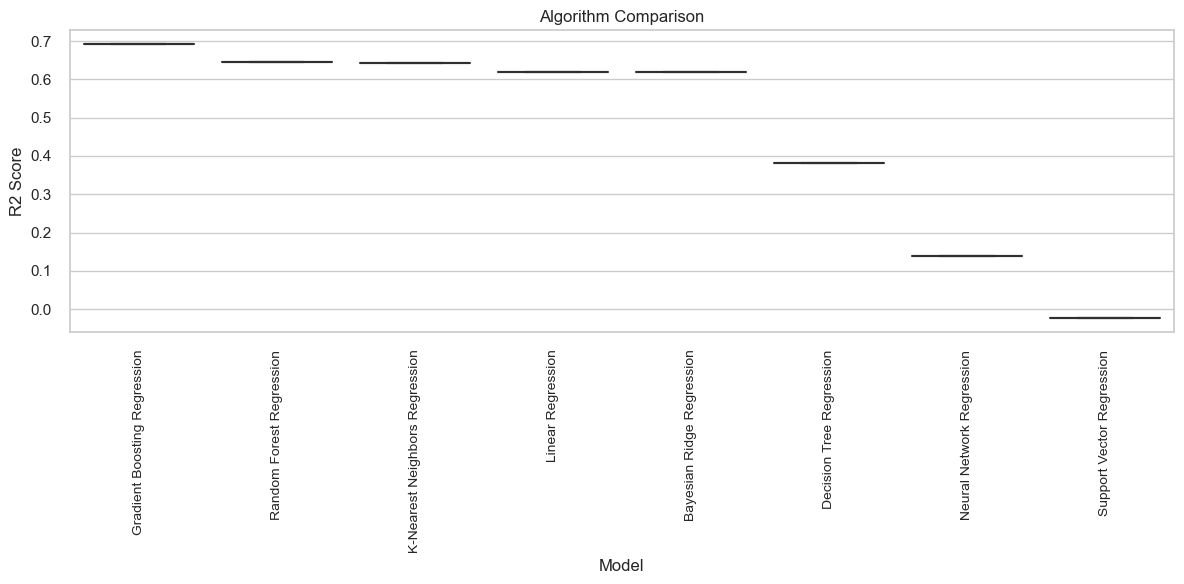

Random Forest Regression:
R2 Score: 0.6311104237135364
MSE: 7900.26842316157
MAE: 65.07522240778806

Predicted number of bikes for the scenario during peak hours (Hour: 8): 117.25571428571428

Predicted number of bikes for the scenario during peak hours (Hour: 17): 117.25571428571428

Predicted number of bikes for the scenario during peak hours (Hour: 18): 117.25571428571428

Gradient Boosting Regression:
R2 Score: 0.6919766551963924
MSE: 6596.7358824441935
MAE: 62.66860694771413

Predicted number of bikes for the scenario during peak hours (Hour: 8): 86.75751566906052

Predicted number of bikes for the scenario during peak hours (Hour: 17): 86.75751566906052

Predicted number of bikes for the scenario during peak hours (Hour: 18): 86.75751566906052

Support Vector Regression:
R2 Score: -0.022787542007402184
MSE: 21904.37638023502
MAE: 128.21108712441173

Predicted number of bikes for the scenario during peak hours (Hour: 8): 219.94443124531517

Predicted number of bikes for the scenar

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
/Users/nataliemac/opt/anaconda3/lib/

Neural Network Regression:
R2 Score: 0.03863565278609449
MSE: 20588.91571809928
MAE: 125.75152217454357

Predicted number of bikes for the scenario during peak hours (Hour: 8): 1136.0893262377524

Predicted number of bikes for the scenario during peak hours (Hour: 17): 1294.3062714558162

Predicted number of bikes for the scenario during peak hours (Hour: 18): 1311.884861000871

Linear Regression:
R2 Score: 0.6184832467135428
MSE: 8170.696470305017
MAE: 71.46566589058607

Predicted number of bikes for the scenario during peak hours (Hour: 8): -1690.3302324199963

Predicted number of bikes for the scenario during peak hours (Hour: 17): -1839.6860213132204

Predicted number of bikes for the scenario during peak hours (Hour: 18): -1856.281108968023

Decision Tree Regression:
R2 Score: 0.39778871039338515
MSE: 12897.167990607515
MAE: 81.23171462829737

Predicted number of bikes for the scenario during peak hours (Hour: 8): 66.0

Predicted number of bikes for the scenario during peak hours 

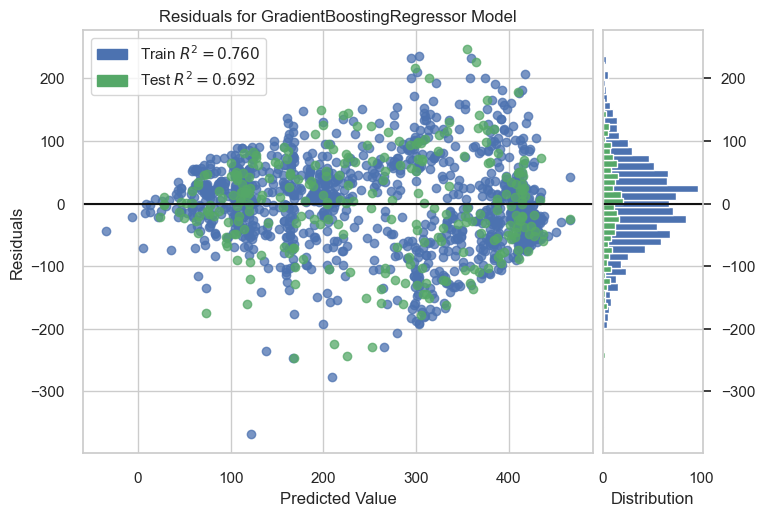

Model: K-Nearest Neighbors Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names


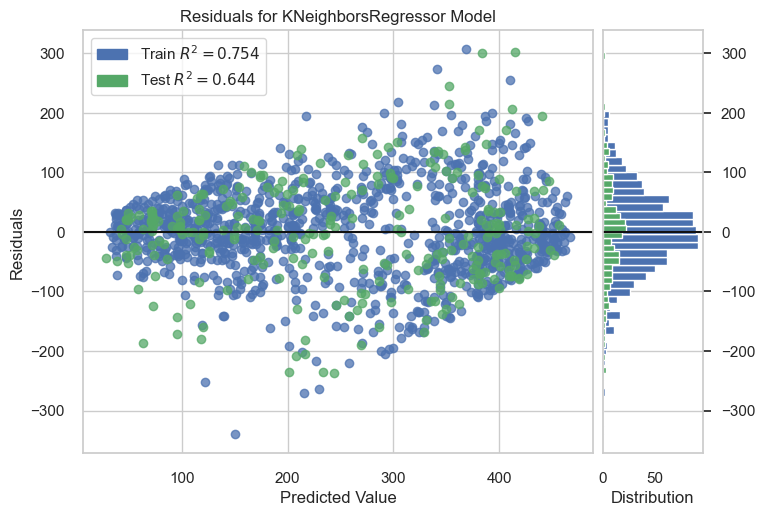

Model: Random Forest Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names


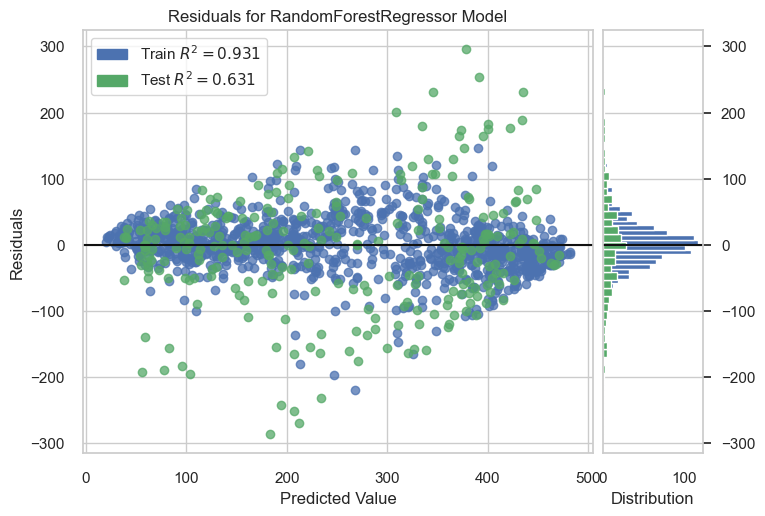

Model: Linear Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names


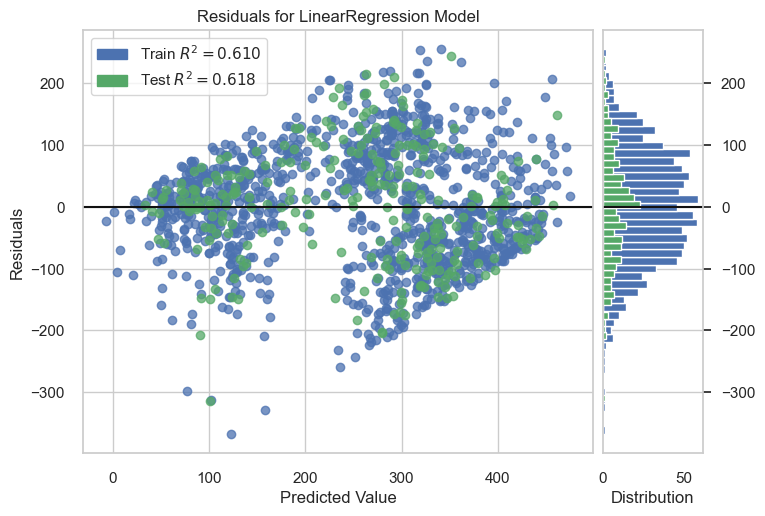

Model: Bayesian Ridge Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names


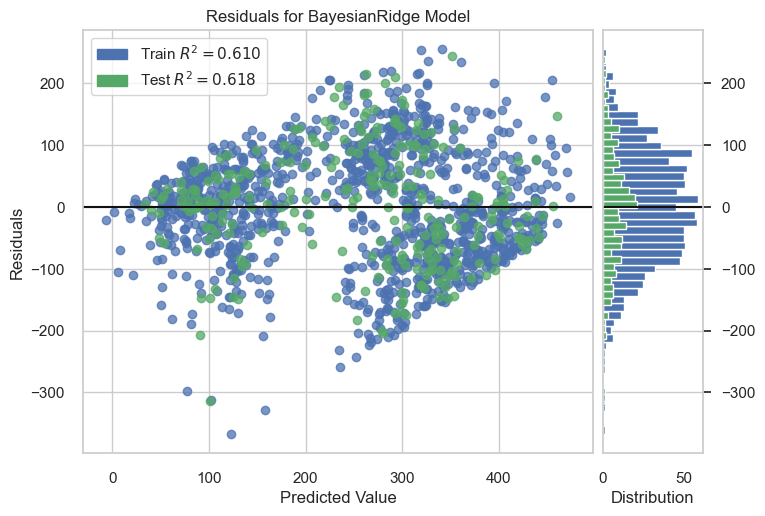

Model: Decision Tree Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


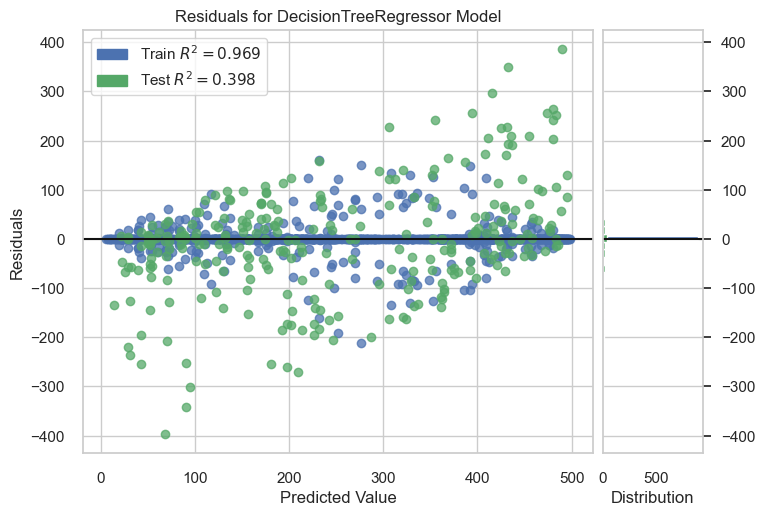

Model: Neural Network Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names


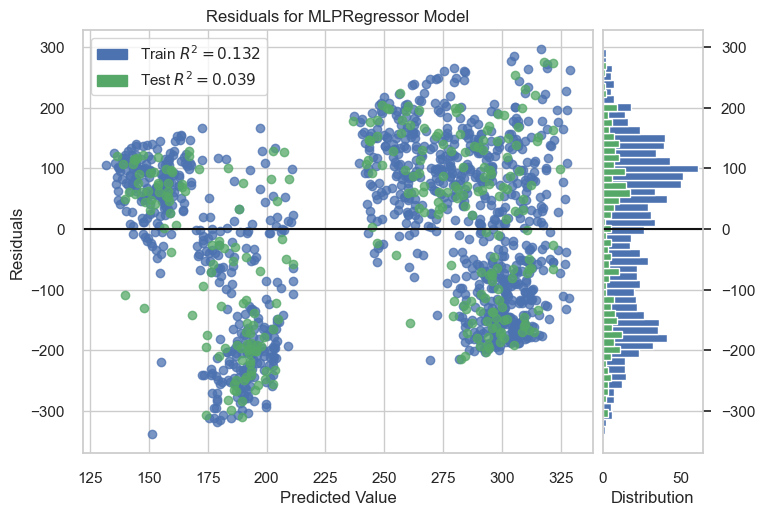

Model: Support Vector Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names


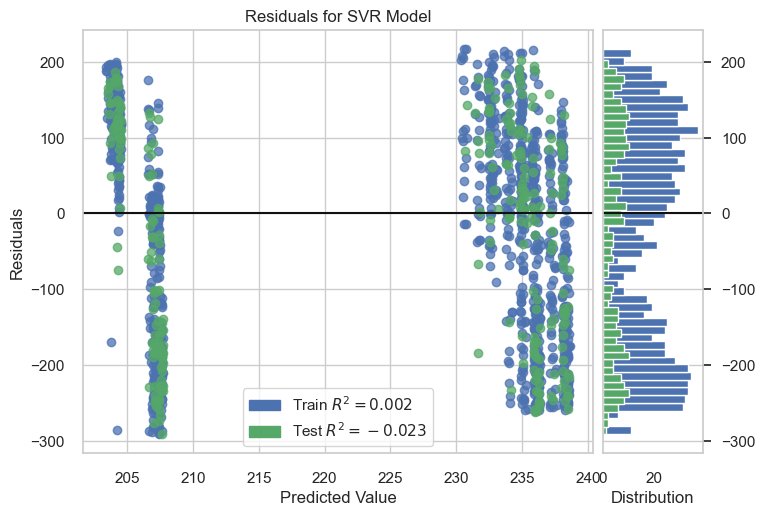

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Define the features and target variables
features = ['workingday', 'temp', 'hour', 'humidity', 'weather']
target = 'member'

# Filter the data for peak hours
peak_hours = [8, 17, 18]
peak_data = Bike_Sharing_hour_no_outliers[Bike_Sharing_hour_no_outliers['hour'].isin(peak_hours)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(peak_data[features], peak_data[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]

def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        # r2 = 1
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Provide prediction for a specific scenario during peak hours
        scenario_data = [[1, 2, 25, 8, 70], [1, 2, 25, 17, 70], [1, 2, 25, 18, 70]]
        scenario_prediction = model.predict(scenario_data)
        for i in range(len(scenario_data)):
            print(f'Predicted number of bikes for the scenario during peak hours (Hour: {scenario_data[i][3]}): {scenario_prediction[i]}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores for peak hours
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores for peak hours
for model, score in top_models[:10]:
    print(f"{model}: {score}")

# Plot the accuracy results of the models using seaborn boxplots
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Add grid lines to the plot
boxplot = sns.boxplot(x=[model[0] for model in top_models], y=[model[1] for model in top_models], palette="Blues")  # Use a different color palette

plt.title('Algorithm Comparison')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=90, fontsize=10)  # Rotate and adjust font size of x-axis tick labels

# Adjust the layout to prevent overlapping
plt.tight_layout()

plt.show()

#Plotting residuals
# Get the top regression models
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Visualize the residuals for the top models
for name, r2_score in top_models:
    print(f"Model: {name}")
    model = next(model for model in models if model[0] == name)[1]

    residuals_plot = ResidualsPlot(model)
    residuals_plot.fit(X_train, y_train)
    residuals_plot.score(X_test, y_test)
    residuals_plot.show()



In [26]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Define the features and target variables
features = ['workingday', 'temp', 'hour', 'humidity','weather']
target = 'member'

# Filter the data for peak hours
peak_hours = [8, 17, 18]
peak_data = Bike_Sharing_hour_no_outliers[Bike_Sharing_hour_no_outliers['hour'].isin(peak_hours)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(peak_data[features], peak_data[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]

def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Provide prediction for a specific scenario during peak hours
        scenario_data = [[1, 2, 25, 8, 70], [1, 2, 25, 17, 70], [1, 2, 25, 18, 70]]
        scenario_prediction = model.predict(scenario_data)
        for i in range(len(scenario_data)):
            print(f'Predicted number of bikes for the scenario during peak hours (Hour: {scenario_data[i][3]}): {scenario_prediction[i]}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)

    return top_models

# Get the top regression models and their scores for peak hours
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores for peak hours
for model, score in top_models[:10]:
    print(f"{model}: {score}")


Random Forest Regression:
R2 Score: 0.631854421753992
MSE: 7884.334700433279
MAE: 65.07797033801529

Predicted number of bikes for the scenario during peak hours (Hour: 8): 115.045

Predicted number of bikes for the scenario during peak hours (Hour: 17): 115.045

Predicted number of bikes for the scenario during peak hours (Hour: 18): 115.045

Gradient Boosting Regression:
R2 Score: 0.6922606320326685
MSE: 6590.654135014173
MAE: 62.65134723251258

Predicted number of bikes for the scenario during peak hours (Hour: 8): 86.7575156690606

Predicted number of bikes for the scenario during peak hours (Hour: 17): 86.7575156690606

Predicted number of bikes for the scenario during peak hours (Hour: 18): 86.7575156690606

Support Vector Regression:
R2 Score: -0.022787542007402184
MSE: 21904.37638023502
MAE: 128.21108712441173

Predicted number of bikes for the scenario during peak hours (Hour: 8): 219.94443124531517

Predicted number of bikes for the scenario during peak hours (Hour: 17): 219.

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names


Neural Network Regression:
R2 Score: 0.04962587577830191
MSE: 20353.545251568627
MAE: 124.87281347540939

Predicted number of bikes for the scenario during peak hours (Hour: 8): 1058.2534691202914

Predicted number of bikes for the scenario during peak hours (Hour: 17): 1214.6490519637005

Predicted number of bikes for the scenario during peak hours (Hour: 18): 1232.0263389463014

Linear Regression:
R2 Score: 0.6184832467135428
MSE: 8170.696470305017
MAE: 71.46566589058607

Predicted number of bikes for the scenario during peak hours (Hour: 8): -1690.3302324199963

Predicted number of bikes for the scenario during peak hours (Hour: 17): -1839.6860213132204

Predicted number of bikes for the scenario during peak hours (Hour: 18): -1856.281108968023

Decision Tree Regression:
R2 Score: 0.3987495947975843
MSE: 12876.589353517187
MAE: 81.62799760191848

Predicted number of bikes for the scenario during peak hours (Hour: 8): 66.0

Predicted number of bikes for the scenario during peak hours

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names


Random Forest Regression:
R2 Score: 0.7008634411616375
MSE: 222.22046926651836
MAE: 9.74873478360169

Predicted number of bikes for the scenario during peak hours (Hour: 8): 22.16

Predicted number of bikes for the scenario during peak hours (Hour: 17): 22.16

Predicted number of bikes for the scenario during peak hours (Hour: 18): 22.16

Gradient Boosting Regression:
R2 Score: 0.7363124589156245
MSE: 195.8863515280552
MAE: 9.296775401436141

Predicted number of bikes for the scenario during peak hours (Hour: 8): 1.6883099472400227

Predicted number of bikes for the scenario during peak hours (Hour: 17): 1.6883099472400227

Predicted number of bikes for the scenario during peak hours (Hour: 18): 1.6883099472400227

Support Vector Regression:
R2 Score: 0.047676497054390476
MSE: 707.4554061192473
MAE: 20.27085151709564

Predicted number of bikes for the scenario during peak hours (Hour: 8): 22.03474378583919

Predicted number of bikes for the scenario during peak hours (Hour: 17): 22.034

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
/Users/nataliemac/opt/anaconda3/lib/

Neural Network Regression:
R2 Score: 0.40421346044533113
MSE: 442.59372681375714
MAE: 15.96743047396276

Predicted number of bikes for the scenario during peak hours (Hour: 8): -256.8414104056408

Predicted number of bikes for the scenario during peak hours (Hour: 17): -274.38120872058136

Predicted number of bikes for the scenario during peak hours (Hour: 18): -276.30518820235636

Linear Regression:
R2 Score: 0.568870637436772
MSE: 320.27435775626407
MAE: 13.28380381016743

Predicted number of bikes for the scenario during peak hours (Hour: 8): -205.41821596205463

Predicted number of bikes for the scenario during peak hours (Hour: 17): -352.96914647736384

Predicted number of bikes for the scenario during peak hours (Hour: 18): -369.3636943123982

Decision Tree Regression:
R2 Score: 0.5122239651058733
MSE: 362.35564048760995
MAE: 12.587230215827338

Predicted number of bikes for the scenario during peak hours (Hour: 8): 2.0

Predicted number of bikes for the scenario during peak hour

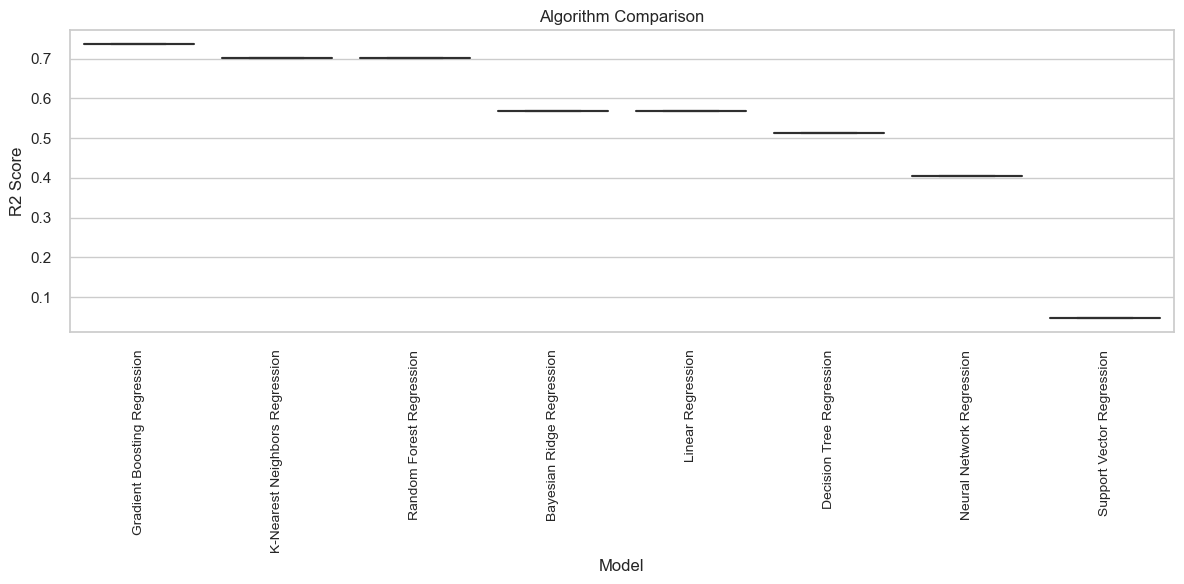

Random Forest Regression:
R2 Score: 0.7004373927132196
MSE: 222.53696915040197
MAE: 9.701776887580845

Predicted number of bikes for the scenario during peak hours (Hour: 8): 24.99

Predicted number of bikes for the scenario during peak hours (Hour: 17): 24.99

Predicted number of bikes for the scenario during peak hours (Hour: 18): 24.99

Gradient Boosting Regression:
R2 Score: 0.7349189870932695
MSE: 196.92152410433906
MAE: 9.323228613178928

Predicted number of bikes for the scenario during peak hours (Hour: 8): 1.688309947240037

Predicted number of bikes for the scenario during peak hours (Hour: 17): 1.688309947240037

Predicted number of bikes for the scenario during peak hours (Hour: 18): 1.688309947240037

Support Vector Regression:
R2 Score: 0.047676497054390476
MSE: 707.4554061192473
MAE: 20.27085151709564

Predicted number of bikes for the scenario during peak hours (Hour: 8): 22.03474378583919

Predicted number of bikes for the scenario during peak hours (Hour: 17): 22.0347

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
/Users/nataliemac/opt/anaconda3/lib/

Neural Network Regression:
R2 Score: 0.41226973319053806
MSE: 436.60893940786093
MAE: 15.873570831979807

Predicted number of bikes for the scenario during peak hours (Hour: 8): -310.52706177759165

Predicted number of bikes for the scenario during peak hours (Hour: 17): -331.2161861256358

Predicted number of bikes for the scenario during peak hours (Hour: 18): -333.48122894447

Linear Regression:
R2 Score: 0.568870637436772
MSE: 320.27435775626407
MAE: 13.28380381016743

Predicted number of bikes for the scenario during peak hours (Hour: 8): -205.41821596205463

Predicted number of bikes for the scenario during peak hours (Hour: 17): -352.96914647736384

Predicted number of bikes for the scenario during peak hours (Hour: 18): -369.3636943123982

Decision Tree Regression:
R2 Score: 0.5018810755915966
MSE: 370.03909372502
MAE: 12.70593525179856

Predicted number of bikes for the scenario during peak hours (Hour: 8): 2.0

Predicted number of bikes for the scenario during peak hours (Hou

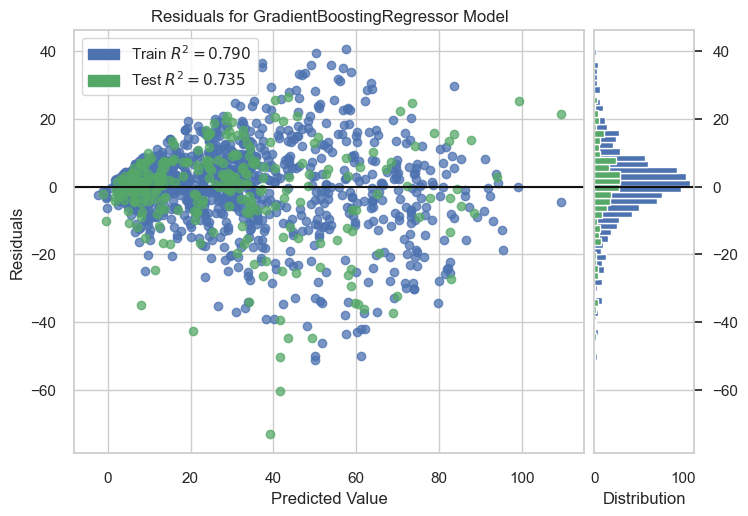

Model: K-Nearest Neighbors Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names


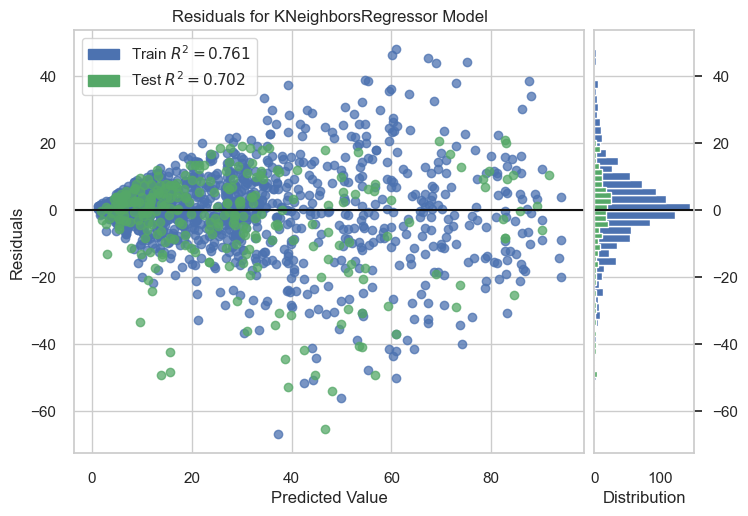

Model: Random Forest Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names


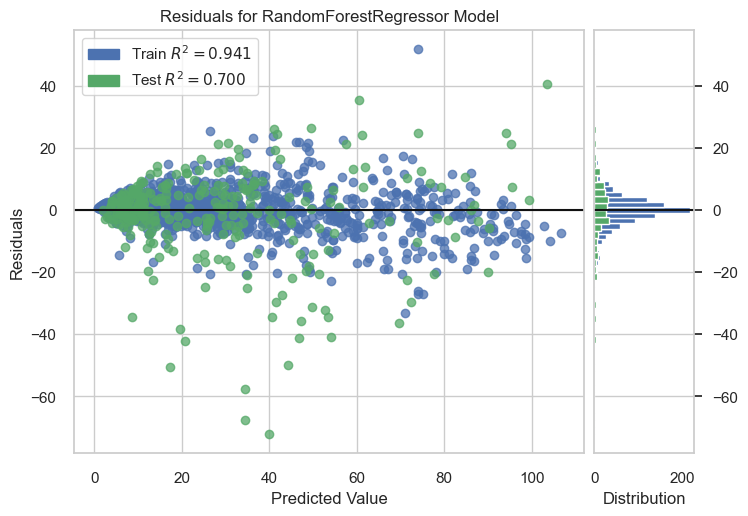

Model: Bayesian Ridge Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names


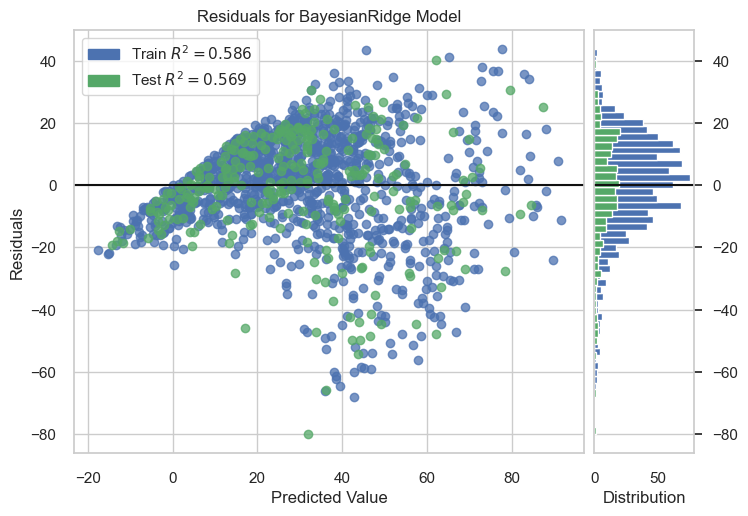

Model: Linear Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names


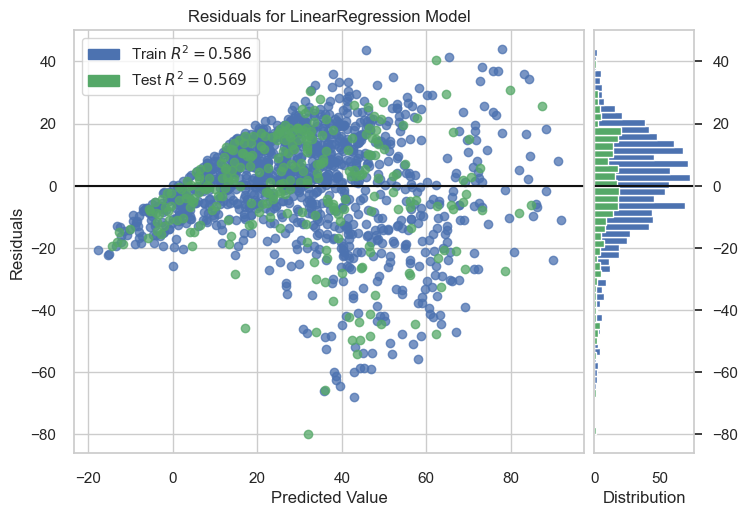

Model: Decision Tree Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


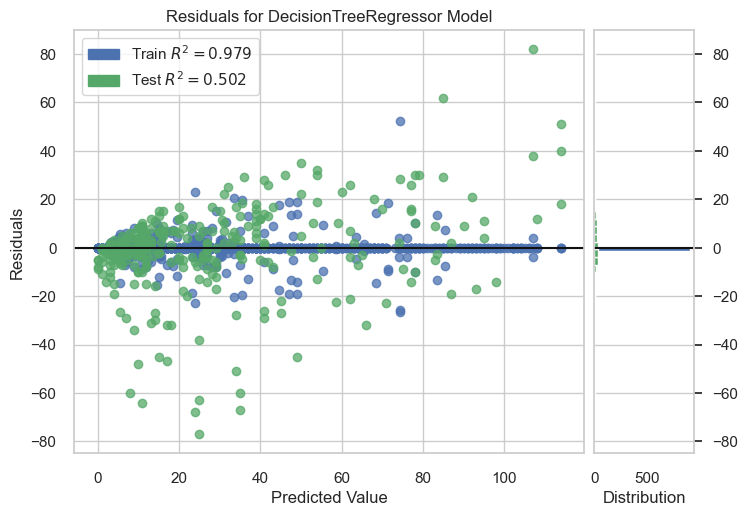

Model: Neural Network Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names


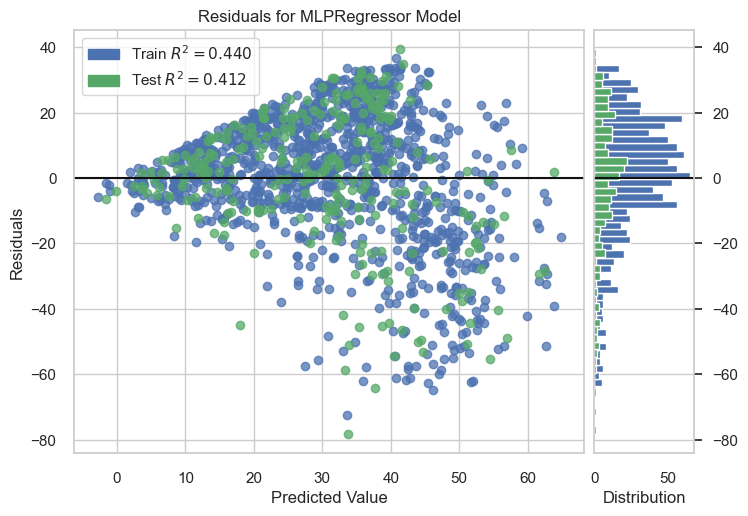

Model: Support Vector Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names


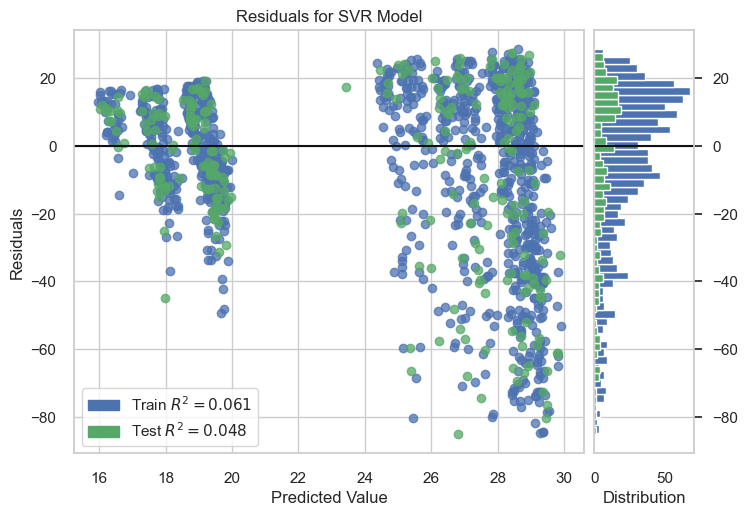

In [20]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the features and target variables
features = ['workingday','temp', 'hour', 'humidity', 'weather']
target = 'non_member'

# Filter the data for peak hours
peak_hours = [8, 17, 18]
peak_data = Bike_Sharing_hour_no_outliers[Bike_Sharing_hour_no_outliers['hour'].isin(peak_hours)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(peak_data[features], peak_data[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]

def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Provide prediction for a specific scenario during peak hours
        scenario_data = [[1, 2, 25, 8, 70], [1, 2, 25, 17, 70], [1, 2, 25, 18, 70]]
        scenario_prediction = model.predict(scenario_data)
        for i in range(len(scenario_data)):
            print(f'Predicted number of bikes for the scenario during peak hours (Hour: {scenario_data[i][3]}): {scenario_prediction[i]}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores for peak hours
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores for peak hours
for model, score in top_models[:10]:
    print(f"{model}: {score}")

# Plot the accuracy results of the models using seaborn boxplots
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Add grid lines to the plot
boxplot = sns.boxplot(x=[model[0] for model in top_models], y=[model[1] for model in top_models], palette="Blues")  # Use a different color palette

plt.title('Algorithm Comparison')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=90, fontsize=10)  # Rotate and adjust font size of x-axis tick labels

# Adjust the layout to prevent overlapping
plt.tight_layout()

plt.show()

#Plotting residuals
# Get the top regression models
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Visualize the residuals for the top models
for name, r2_score in top_models:
    print(f"Model: {name}")
    model = next(model for model in models if model[0] == name)[1]

    residuals_plot = ResidualsPlot(model)
    residuals_plot.fit(X_train, y_train)
    residuals_plot.score(X_test, y_test)
    residuals_plot.show()



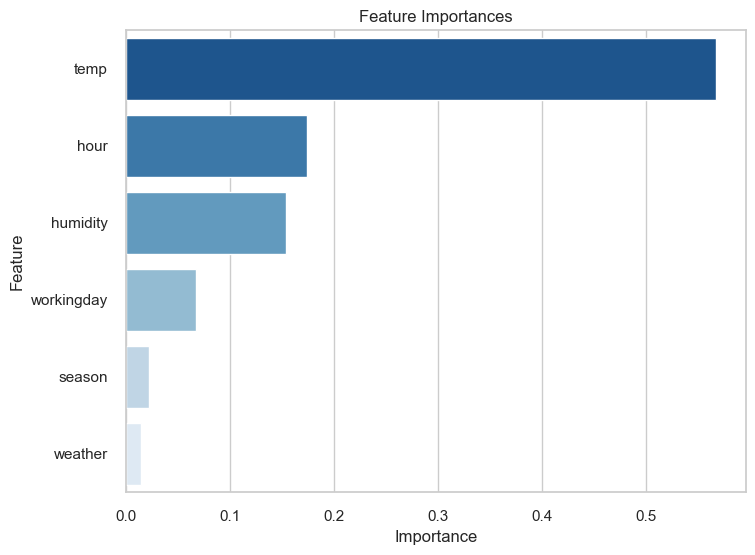

In [ ]:
# Fit the Gradient Boosting Regressor model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Get the feature importances
importances = model.feature_importances_

# Create a list of feature names
feature_names = X_train.columns

# Sort the feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x=sorted_importances, y=sorted_feature_names, palette='Blues_r')

plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

plt.show()
